# <center> **Practical introduction to Machine Learning**  </center>
## <center> Practical Session 1 : Unsupervised learning </center>

*First Name : Chaima* <br>
*Family Name : ELMESSAI*

In [8]:
import numpy as np
import pylab as pl
import scipy as sp

from sklearn.cluster import KMeans
from scipy.stats import mode
from sklearn.metrics import confusion_matrix
import seaborn as sns
from sklearn.metrics import rand_score,adjusted_rand_score
from sklearn.mixture import GaussianMixture
from sklearn.decomposition import PCA
from sklearn.decomposition import NMF
from sklearn.manifold import TSNE

# 1 Datasets

## 1.3 Loading the data


- **Temperature dataset**

In [9]:
temper_data = np.load("temper.npz")

In [10]:
temper_data.files

['villes', 'data', 'varname']

In [11]:
data = temper_data['data']
x1 = data[:,:12]
villes = temper_data['villes']
varnames = temper_data['varname']

In [12]:
varnames

array(['January', 'February', 'March', 'April', 'May', 'June', 'July',
       'August', 'September', 'October', 'November', 'December',
       'Latitude', 'Longitude'], dtype='<U9')

In [13]:
villes

array(['Bordeaux', 'Brest', 'Clermont-Ferrand', 'Grenoble', 'Lille',
       'Lyon', 'Marseille', 'Montpellier', 'Nantes', 'Nice', 'Paris',
       'Rennes', 'Strasbourg', 'Toulouse', 'Vichy'], dtype='<U16')

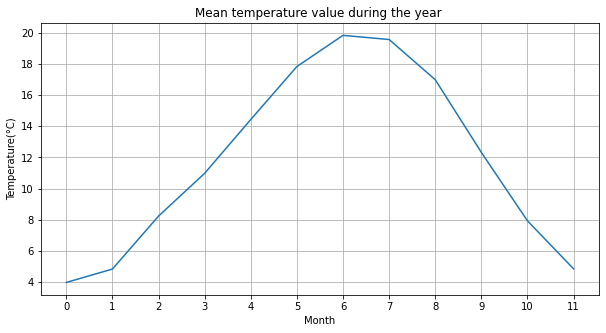

In [14]:
# computing the mean value for the temperature dataset and vizualizing it
mean_value_temper = x1.mean(axis=0) # It is an array containing the mean value for each of the features 
pl.figure(figsize=(10,5))
pl.plot(mean_value_temper)
pl.xticks(np.arange(0, 12))
pl.title('Mean temperature value during the year ')
pl.xlabel('Month')
pl.ylabel('Temperature(°C)')
pl.grid()

> **Comments:** <br>
The figure that represents the mean value of temperature over 15 cities during the year is a bell curve since it is increasing until reaching a maximum value that is around 20°C in july and then decreasing until the end of the year. We can clearly see the sucession of the seasons : winter, spring, summer and autumn. In fact, From a global minimum which is reached in january the figure increases during the winter, the spring and the first months of summer and then decreases during the last months of summer and autumn.  

Text(0, 0.5, 'Temperature(°C)')

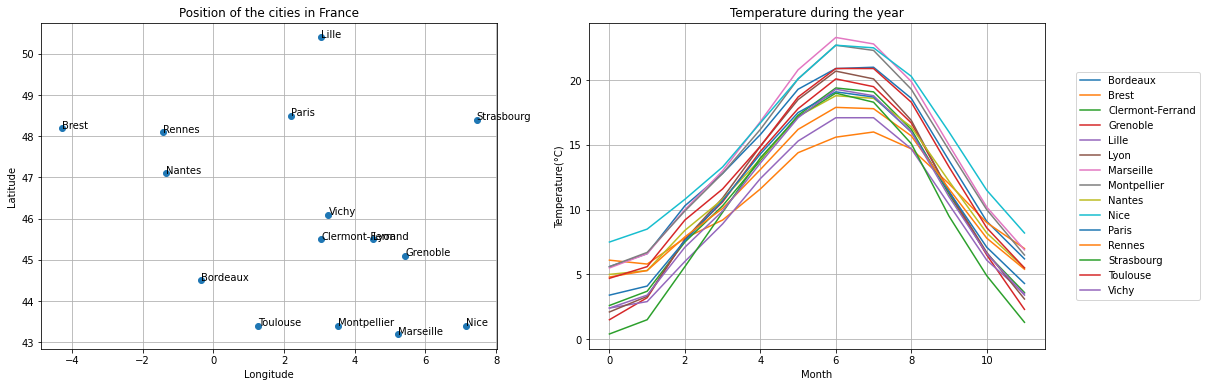

In [15]:
fig, (ax, ax1) = pl.subplots(1,2,figsize=(18,6))

x = data[:,13]
y = data[:,12]
ax.scatter(x, y)
for i, txt in enumerate(villes):
    ax.annotate(txt, (x[i], y[i]))
ax.grid()
ax.set_title('Position of the cities in France')
ax.set_xlabel(varnames[13])
ax.set_ylabel(varnames[12])

ax1.plot(x1.T)
ax1.grid()
ax1.legend(villes, loc='right', bbox_to_anchor= (1.35,0.5))
ax1.set_title('Temperature during the year')
ax1.set_xlabel('Month')
ax1.set_ylabel('Temperature(°C)')


> **Comments:** <br>
We notice from the plots that there is correspondance between the position of the cities and their temperatures during the year.In fact, the cities that are located in the south are warmer than those located in the north. We can see from the temperature plots that there is intersections between the different curves which means that concluding if a city is warmer or colder than an other city depends on the period of time.
Also, the temperature plots allow us to see that there is a large variation in the dataset since the maximums reached by the temperatures of the cities are not close especially when comparing the maximum temperature of Marseille and Brest.  


- **Digits dataset**

In [16]:
digits_data = np.load("digits.npz")

In [17]:
digits_data.files

['xt', 'yt', 'y', 'x']

In [18]:
x2,x2_t, y2,y2_t = digits_data['x'], digits_data['xt'], digits_data['y'], digits_data['yt']
# Simple scaling to have values between [0,1]
x2 = x2/255
x2_t = x2_t/255

Text(0.5, 1.0, 'Mean image of the digits dataset ')

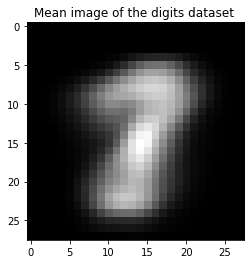

In [19]:
# Computing the mean value and vizualizing it 
mean_value_digits = x2.mean(axis=0)
pl.imshow(mean_value_digits.reshape(28,28), cmap='gray')
pl.title('Mean image of the digits dataset ')

> **Comments:** <br>
We notice that the mean image is a is very blurry and doesn't represent a digit but it looks like a mixture between the 1,7 and 8 classes.

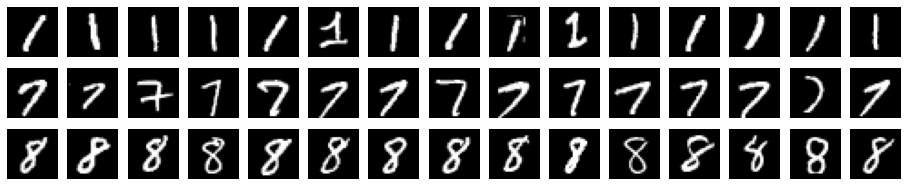

In [20]:
fig, axs = pl.subplots(3, 15, figsize=(16,3))
pl.subplots_adjust(left=0.125, bottom=0.1, right=0.9 , top=0.9  , wspace=0.2, hspace=0.2)
im_index=0
for i in range(3):
  for j in range(15):
    image = x2[j+im_index]
    axs[i][j].imshow(image.reshape(28,28), cmap='gray')
    axs[i][j].axis('off')
  im_index = im_index+1000
  
pl.show()

> **Comments:** <br>
We notice that the displayed samples from each class are different in the way of handwritting which allows to have a varied dataset.

#2  Clustering


- **Temperature dataset**

In [21]:
K = 3
# Performing K-means on the temperature dataset
kmeans_temper = KMeans(n_clusters=K, random_state=0)
temper_pred_clusters = kmeans_temper.fit_predict(x1)
temper_centroids = kmeans_temper.cluster_centers_

- Cities in : 
class1: ['Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Paris' 'Strasbourg' 'Vichy']
class2: ['Brest' 'Nantes' 'Rennes']
class3: ['Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse']


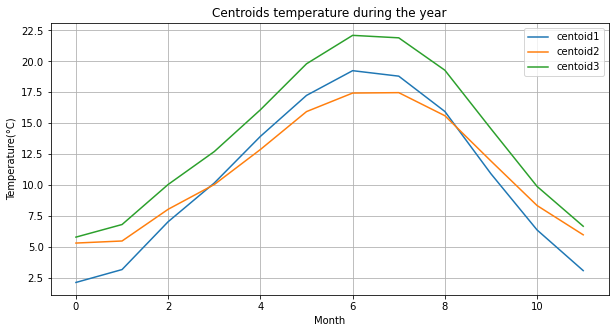

In [22]:
# Plotting the centroids for the temperature dataset
pl.figure(figsize=(10,5))
pl.plot(temper_centroids.T)
pl.title('Centroids temperature during the year')
pl.xlabel('Month')
pl.ylabel('Temperature(°C)')
pl.legend([f'centoid{i+1}' for i in range(K)])
pl.grid()

# displaying the names of the cities in each cluster 
print('- Cities in : ')
for i in range(K):
    print(f'class{i+1}:',villes[temper_pred_clusters==i])

> **comments:** <br>
- The temperature plots of the centroids have a bell curve which is the same curve shape of the temperature of the samples. We notice that the bell curve of the centroid 3 doesn't intersect with those of the two other centroids and the difference between the temperature values of this curve and those of centroid 1 and centroid 2 curves is significant which means that the centroid 3 is far in terms of termperature from the other two centroids. We also notice that the temperature curves of centroid 1 and 2 interset with each other which means that these two centroids are close in terms of temperature values so it is possible to merge the first and the second cluster in one cluster.
- Basing on the displayed names of cities in each cluster we conclude that the samples are custered by geographical positions of the cities since the first cluster contains samples whose cities are located in the Nort-Est, the second cluster contains samples whose cities are located in the North-West and the third cluster contains samples having cities in the south.

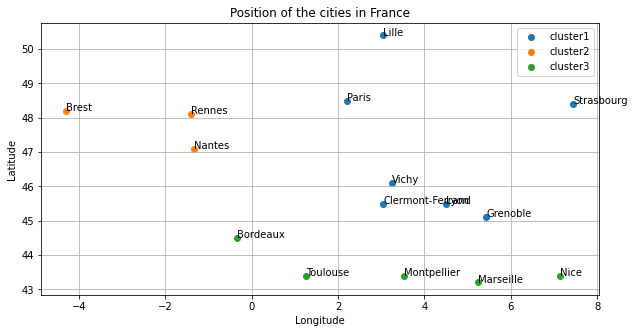

In [23]:
pl.figure(figsize=(10,5))
for i in range(K):
    pl.scatter(data[temper_pred_clusters == i,13] ,data[temper_pred_clusters == i,12]  , label = i)

for i, txt in enumerate(villes):
    pl.annotate(txt, (data[:,13][i], data[:,12][i]))

pl.title('Position of the cities in France')
pl.xlabel(varnames[13])
pl.ylabel(varnames[12])
pl.legend([f'cluster{i+1}' for i in range(K)])
pl.grid()
pl.show()

> **Comments:** <br>
As we can see, the above figure allows us to verify that the clustering recovers geographical similarities between the cities. In fact, K-means is based on minimizing the euclidien distance between samples and their closest center so samples that are close to the same center which means samples that have close temperature values during the year will form a cluster and closness in terms of temperature values means logically closeness in geographical position of the cities since the more the cities are close the more they have similar weather which includes temperature.


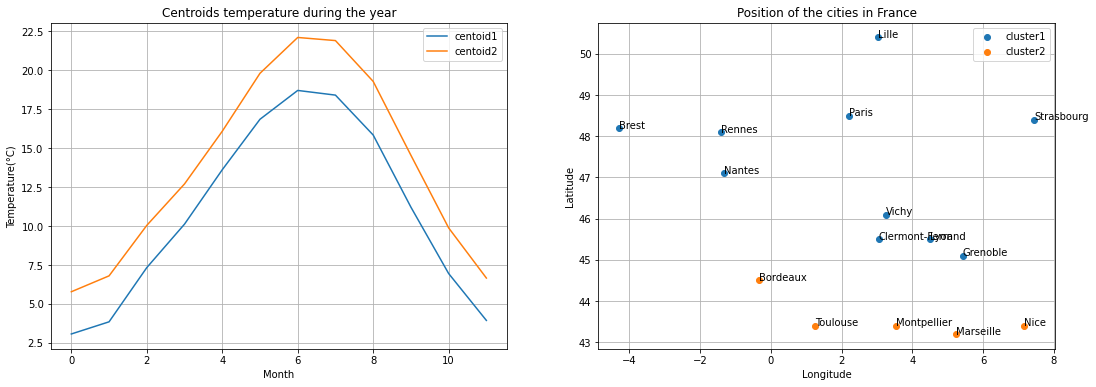

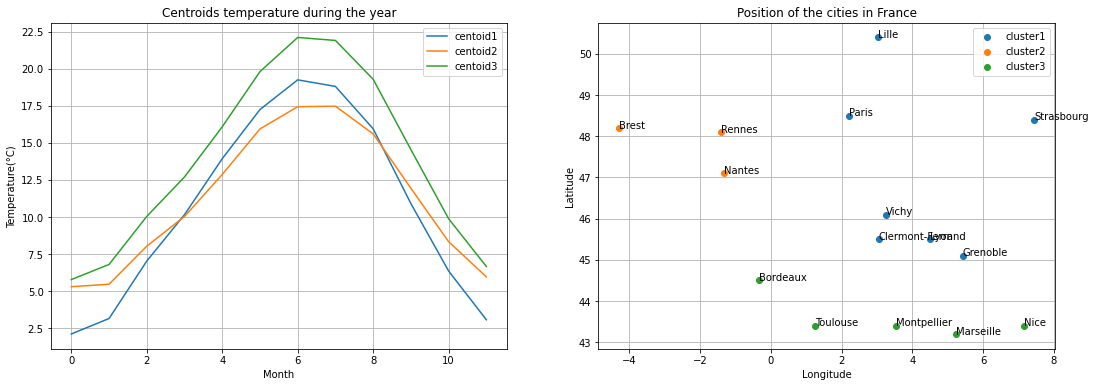

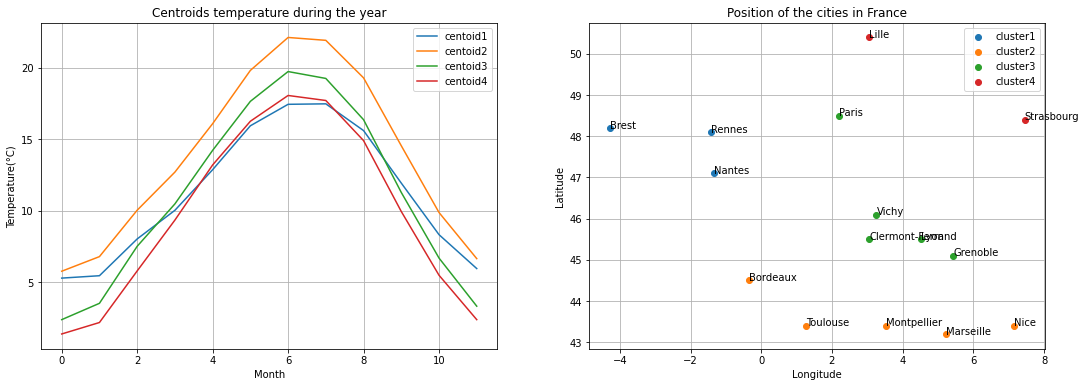

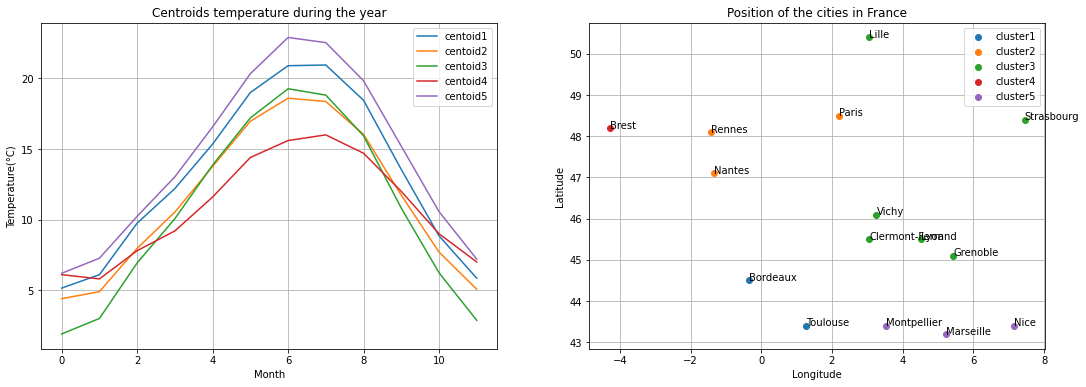

In [25]:
for k in range(2,6):
  kmeans_temper_k = KMeans(n_clusters=k, random_state=0)
  temper_pred_clusters_k = kmeans_temper_k.fit_predict(x1)
  temper_centroids_k = kmeans_temper_k.cluster_centers_
  
  fig, ax = pl.subplots(1,2,figsize=(18,6))
  ax[0].plot(temper_centroids_k.T)
  ax[0].set_title('Centroids temperature during the year')
  ax[0].set_xlabel('Month')
  ax[0].set_ylabel('Temperature(°C)')
  ax[0].legend([f'centoid{i+1}' for i in range(k)])
  ax[0].grid()
  for i in range(k):
    ax[1].scatter(data[temper_pred_clusters_k == i,13] ,data[temper_pred_clusters_k == i,12]  , label = i)
  for i, txt in enumerate(villes):
    ax[1].annotate(txt, (data[:,13][i], data[:,12][i]))
  ax[1].set_title('Position of the cities in France')
  ax[1].set_xlabel(varnames[13])
  ax[1].set_ylabel(varnames[12])
  ax[1].legend([f'cluster{i+1}' for i in range(k)])
  ax[1].grid()


> **Comments:**
- For K=2, we obtain two clusters whose centroids temperature curves doesn't intersect such that the second centroid has higher temperature values than the first one.Thus clustering using K=2 gives two well seperated clusters : one groupping samples of south cities and the other containing samples of north cities.
- Since the south cities are very close in terms of temperature behavior so they have close distance to their closest centroid that's why for K=3 and K=4 the south cluster will not be devided. In fact, the north cluster having samples that doesn't have close temperature behavior  will be respectively devided in two clusters in case of K=3 and in three clusters in case of K=4.
- Clustering with K=5 gives us three north clusters and two south clusters such that the variance in each cluster is minimal.

$\Longrightarrow$ The good values of K that gives us clustering which best describes the data is K=2 and K=3 since for these two values the variance inter-cluster is small compared to the variance between-cluster.

- **Digits dataset:**

In [26]:
# Performing K-means on the digits dataset
K = 3
kmeans_digits = KMeans(n_clusters=K, random_state=0)
digits_pred_clusters = kmeans_digits.fit_predict(x2)
digits_centroids = kmeans_digits.cluster_centers_

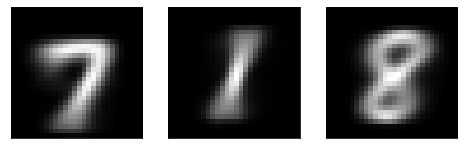

In [27]:
# Plotting the centroids for the digits dataset
fig, ax = pl.subplots(1, K, figsize=(8, 3))
centers = digits_centroids.reshape(K, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

> **Comments:**
- As we can see, the centroids are blurry images of 1,7 and 8. So since the centroids recover the three classes, we can conclude that in each cluster the majority of samples are of the same class so the clustering is done by class. The reason behind this class similarity is that images beloging to each class have white pixels (pixels having intensity eaul to 255)approximately in the same position so minimizing the squared distance between each sample and its closest centroid leads to grouping images of the same class in the same cluster.
- The centroids images are not true images. In fact, they correspond to averaging different samples which explain the blur due to the noise of averaging. 


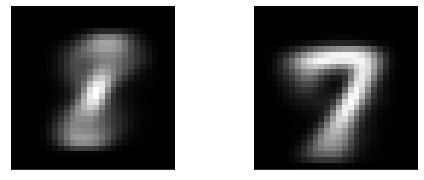

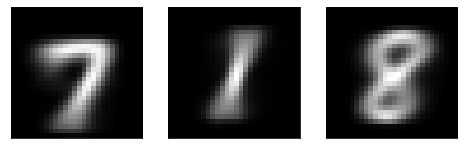

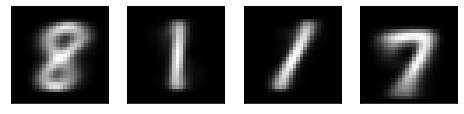

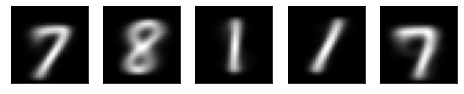

In [28]:
for k in range(2,6):
  kmeans_digits_k = KMeans(n_clusters=k, random_state=0)
  digits_pred_clusters_k = kmeans_digits_k.fit_predict(x2)
  digits_centroids_k = kmeans_digits_k.cluster_centers_
  fig, ax = pl.subplots(1, k, figsize=(8, 3))
  centers = digits_centroids_k.reshape(k, 28, 28)
  for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

> **Comments:**
- Using K=2 we obtain one cluster containig the majority of samples whose class is 7 and an other cluster containing samples of class 1 and 8. Increasing K from 3 to 4 gives in addition to the 8 and 7 centroids , two other centroids that corresponds to two handwritten ways of 1. Similarly increasing K from 4 to 5 gives in addition to the centroids obtained using K=4 an other centroid that corresponds to a different handwritten way of 7. So increasing K leads to clustering taking into consideration not only the class but the handwritten ways that have the majority of samples in the dataset. 
The purpose of clustering the digits is to recognize their classes and not the ways that the different classes were written so K=3 is the good value for clustering since it allows us to obtain clusters correponsing to each class.



Text(0.5, 1.0, 'Predicted labels')

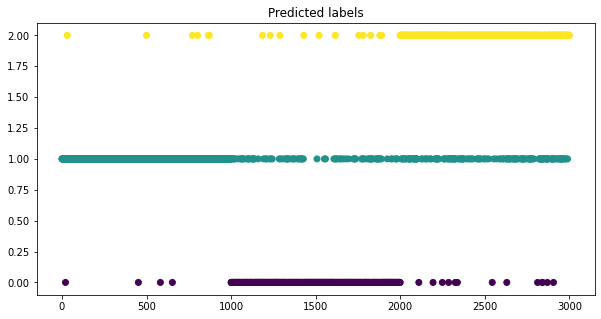

In [29]:
K = 3
kmeans_digits = KMeans(n_clusters=K, random_state=0)
digits_pred_clusters = kmeans_digits.fit_predict(x2)
# Plotting the predicted labels as signals 
pl.figure(figsize=(10,5))
pl.scatter(range(len(y2)),digits_pred_clusters,c=digits_pred_clusters)
pl.title('Predicted labels')


> **Comments:** <br>
The figure above shows that the clustering respecting the true class is not exactely a piecewise constant because of the misclussified samples. In fact, for the first cluster that corresponds to the line in green we can see that it represents the cluster that contains the most misclassified examples since many samples of class 8 and 7 are classified in the same cluster as the samples of class 1.

In [30]:
# Computing the quality of the clustering
print('- The rand index is given by : ', rand_score(y2.reshape(-1),digits_pred_clusters))
print('- The adjusted rand index is given by :', adjusted_rand_score(y2.reshape(-1),digits_pred_clusters))

- The rand index is given by :  0.8815562965432923
- The adjusted rand index is given by : 0.7353304173178205


> - **Displaying the confusion matrix**

In [31]:
labels = np.zeros_like(digits_pred_clusters)
for i in range(k):
    mask = (digits_pred_clusters == i)
    labels[mask] = mode(y2.reshape(-1)[mask])[0]

Text(91.68, 0.5, 'Predicted label')

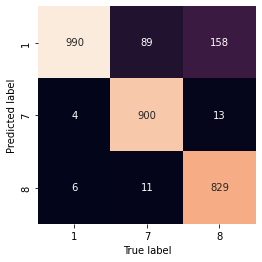

In [32]:
mat = confusion_matrix(y2,labels)
sns.heatmap(mat.T, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=[1,7,8],
            yticklabels=[1,7,8])
pl.xlabel('True label')
pl.ylabel('Predicted label')

> **Comment:** <br>
As we can see from the confusion matrix, 158 samples that are predicted in the cluster of the class 1 have true labels the class 8 and 89 samples that are predicted as 1 have true label the class 7 which justifies the conclusion that we made based on the plot of the predicted labels as signals which is that the class 1 have the highest number of misclassified samples.

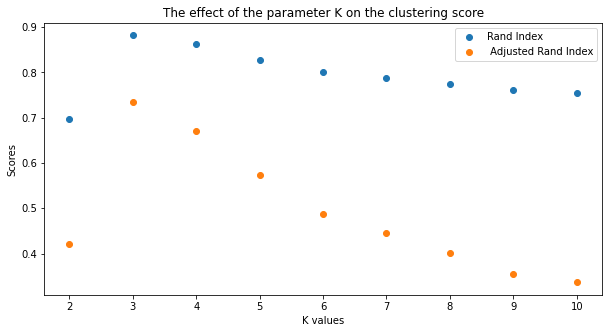

In [33]:
# Examining the effect of the parameter K on the clustering score
rand_scores_list = []
adjusted_rand_scores_list = []
for k in range(2,11):
  kmeans_digits = KMeans(n_clusters=k, random_state=0)
  digits_pred_clusters = kmeans_digits.fit_predict(x2)
  # save scores in the lists so we can plot them
  rand_scores_list.append(rand_score(y2.reshape(-1),digits_pred_clusters))
  adjusted_rand_scores_list.append(adjusted_rand_score(y2.reshape(-1),digits_pred_clusters))

# Plotting scores 
pl.figure(figsize=(10,5))
pl.scatter(np.arange(2,11),rand_scores_list)
pl.scatter(np.arange(2,11),adjusted_rand_scores_list)
pl.title('The effect of the parameter K on the clustering score')
pl.xlabel('K values')
pl.ylabel('Scores')
pl.legend(['Rand Index',' Adjusted Rand Index'])

> **Comments:** <br>
When K increases from 2 to 3, the scores increase considerably and then decrease progressively when K decreases. Thus K=3 gives the highest rand scores which confirms that the best value of K for clustering is K=3.

#3 Density estimation


- **Temperature dataset**

In [34]:
K = 2
GMM_temper = GaussianMixture(n_components=K,covariance_type='diag')
GMM_temper.fit(x1)

GaussianMixture(covariance_type='diag', n_components=2)

In [35]:
# Getting estimated parameters
mus = GMM_temper.means_
sigmas = GMM_temper.covariances_
phi = GMM_temper.weights_

In [36]:
# predicting cluster class
temper_pred_clusters_GMM = GMM_temper.predict(x1)

In [37]:
print('The names of the cities in :')
for i in range(K):
    print(f'-Cluster{i+1} :',villes[temper_pred_clusters_GMM==i])

The names of the cities in :
-Cluster1 : ['Brest' 'Clermont-Ferrand' 'Grenoble' 'Lille' 'Lyon' 'Nantes' 'Paris'
 'Rennes' 'Strasbourg' 'Vichy']
-Cluster2 : ['Bordeaux' 'Marseille' 'Montpellier' 'Nice' 'Toulouse']


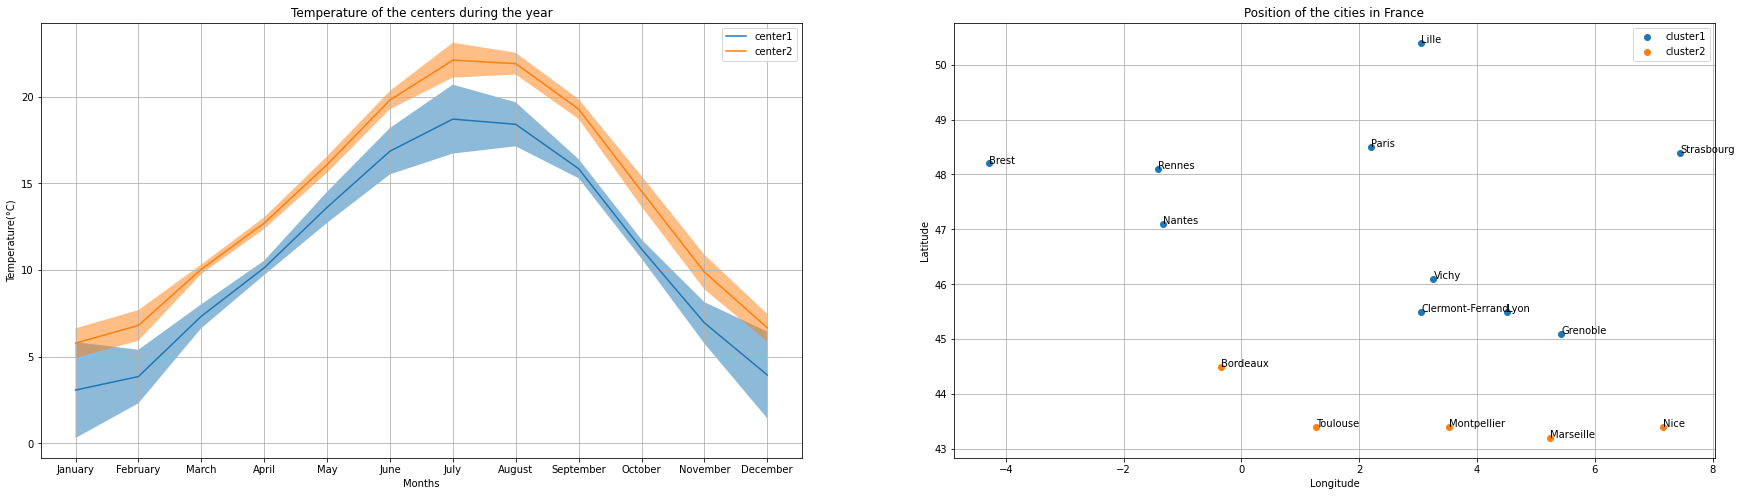

In [38]:
fig, (ax, ax1) = pl.subplots(1,2,figsize=(30,8))
# Plotting the mean and the standard deviation of each Gaussian distribution in the mixture
for k in range(K):
    ax.plot(varnames[:12],mus[k,:],label=f'center{k+1}')
    ax.fill_between(varnames[:12],mus[k,:]+sigmas[k,:],mus[k,:]-sigmas[k,:],alpha=0.5)
  
ax.set_title('Temperature of the centers during the year')
ax.set_xlabel('Months')
ax.set_ylabel('Temperature(°C)')
ax.legend()
ax.grid()

for i in range(K):
    ax1.scatter(data[temper_pred_clusters_GMM==i,13] ,data[temper_pred_clusters_GMM==i,12]  , label = i)
for i, txt in enumerate(villes):
    ax1.annotate(txt, (data[:,13][i],data[:,12][i]))

ax1.set_title('Position of the cities in France')
ax1.set_xlabel(varnames[13])
ax1.set_ylabel(varnames[12])
ax1.legend([f'cluster{i+1}' for i in range(K)])
ax1.grid()

> **Comments:**<br>
Each center correspond to a low/ high temperature. Using the GMM, we can see the variance inter-cluster. In fact, for the first cluster that groups samples of north cities we have large variances during the winter and especially during the summer and this is due to the different climites of these cities locations whereas for the second cluster that contains samples from south cities the variance is approximately the same during the year and it is relatively small compared to the variance of the first cluster.<br>
$\Longrightarrow$ Using K=2, we obtain the same result as the K-means since the samples are clustered by geographical position similarity.


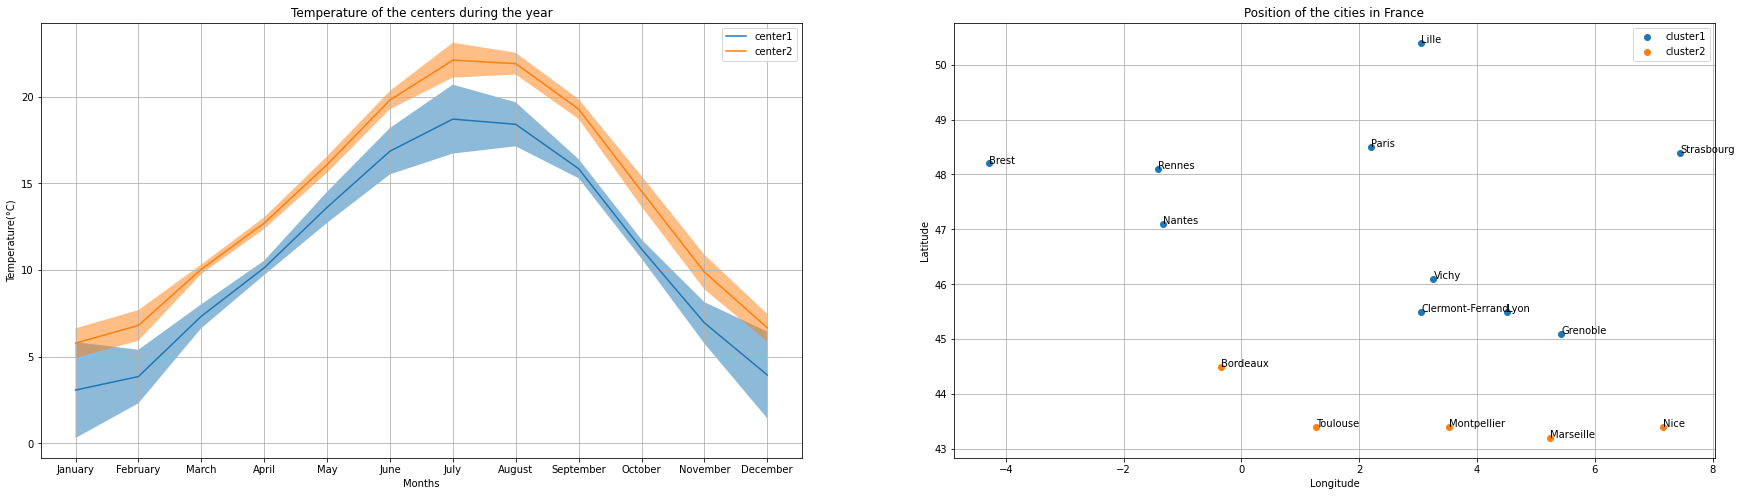

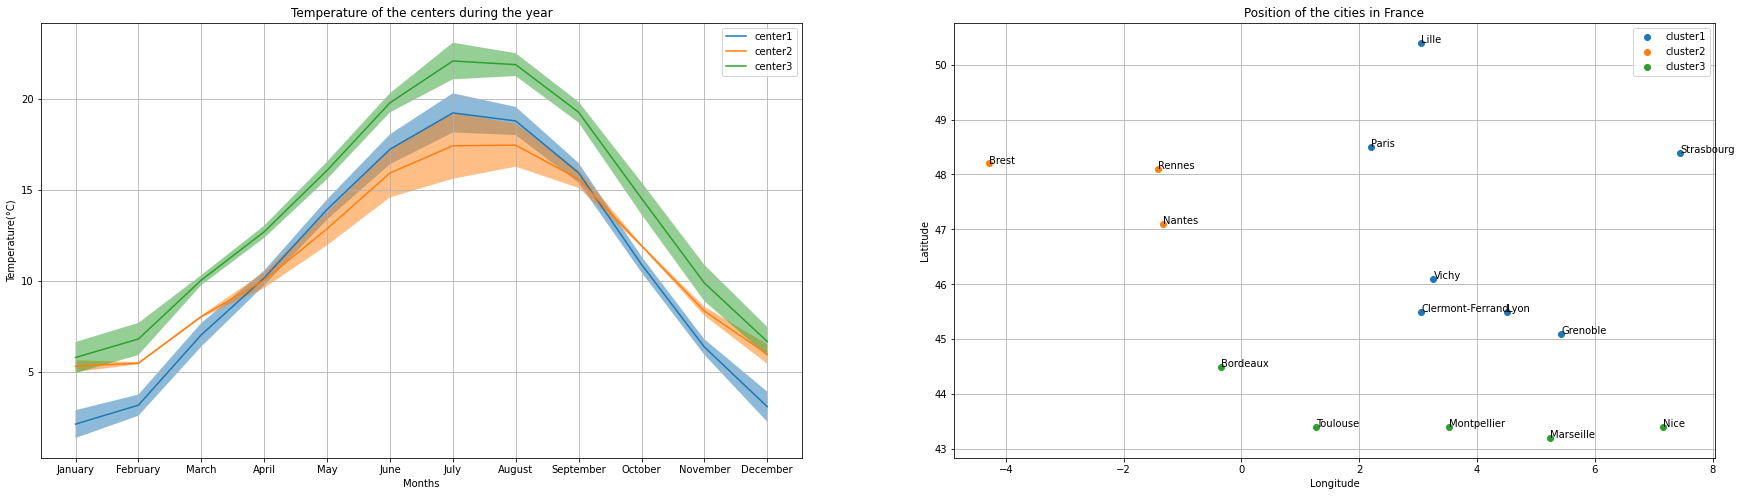

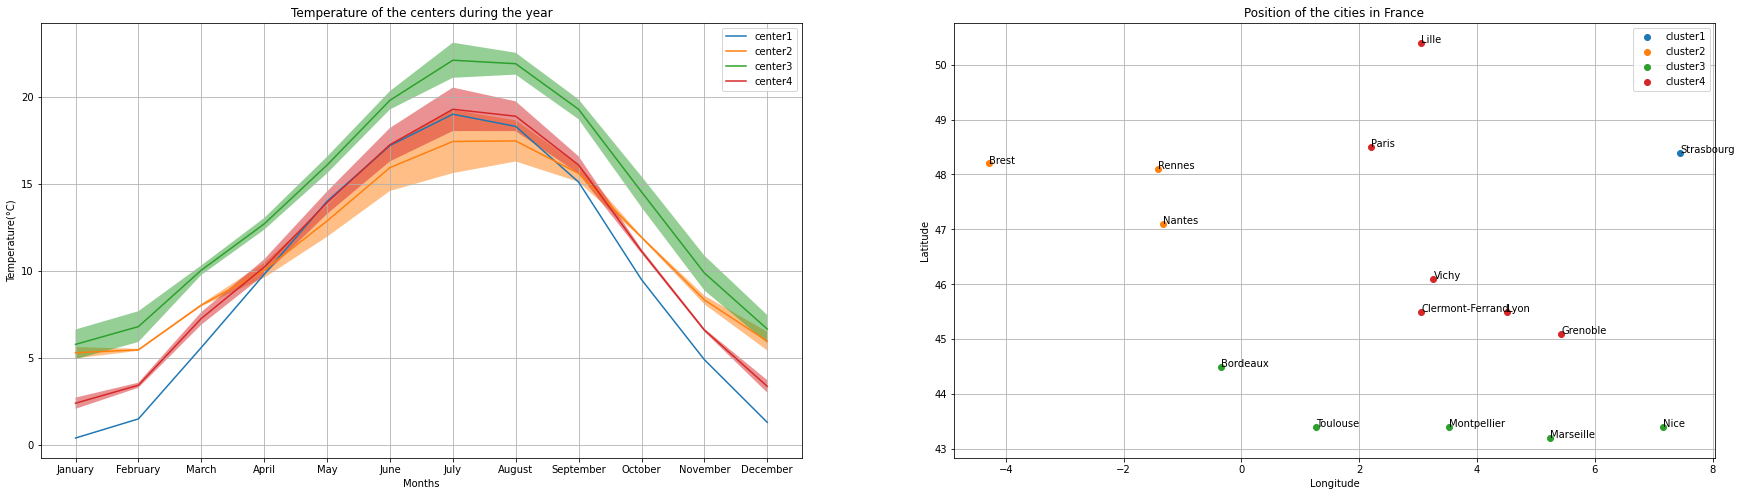

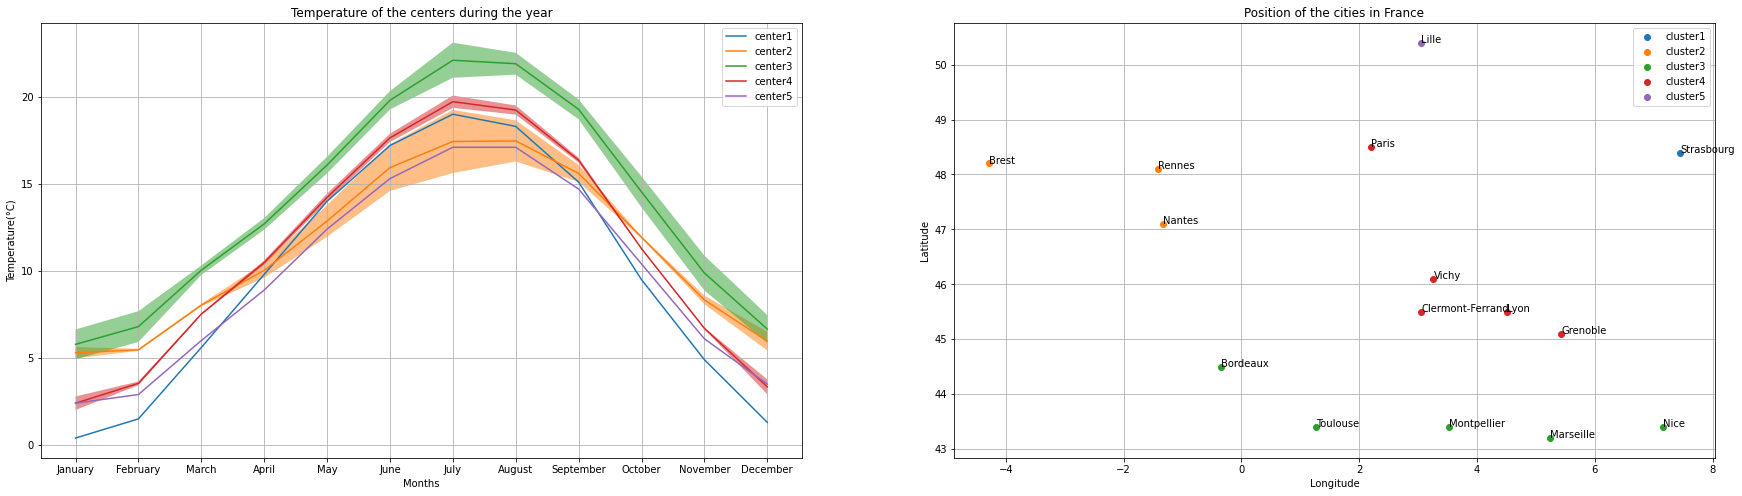

In [39]:
# Changing the value of K
for K in range(2,6):
  GMM_temper = GaussianMixture(n_components=K,covariance_type='diag',random_state=0)
  GMM_temper.fit(x1)

  # Getting estimated parameters
  mus = GMM_temper.means_
  sigmas = GMM_temper.covariances_
  phi = GMM_temper.weights_

  # predicting cluster class
  temper_pred_clusters_GMM = GMM_temper.predict(x1)

  
  fig, (ax, ax1) = pl.subplots(1,2,figsize=(30,8))
  # Plotting the mean and the standard deviation of each Gaussian distribution in the mixture
  for k in range(K):
    ax.plot(varnames[:12],mus[k,:],label=f'center{k+1}')
    ax.fill_between(varnames[:12],mus[k,:]+sigmas[k,:],mus[k,:]-sigmas[k,:],alpha=0.5)
  
  ax.set_title('Temperature of the centers during the year')
  ax.set_xlabel('Months')
  ax.set_ylabel('Temperature(°C)')
  ax.legend()
  ax.grid()
  # Plotting the cities with a scatterplot using their geographical position and using the estimated class as color
  for i in range(K):
    ax1.scatter(data[temper_pred_clusters_GMM==i,13] ,data[temper_pred_clusters_GMM==i,12],label=i)
  for i, txt in enumerate(villes):
    ax1.annotate(txt, (data[:,13][i],data[:,12][i]))
  ax1.set_title('Position of the cities in France')
  ax1.set_xlabel(varnames[13])
  ax1.set_ylabel(varnames[12])
  ax1.legend([f'cluster{i+1}' for i in range(K)])
  ax1.grid()

> **Comments:**<br>
- We notice that for K=2 and K=3 we obtain the same results as in K-means.Looking at the variance, we can clearly see that the variance inter-cluster is higher in summer than the other seasons of the year for K=3 and K=4. Increasing K from 3 to 4 and to 5 leads to having clusters that contains only one sample which means having an unbalanced clustering. 
So to have a good clustering we use K=2 or K=3.
- We also notice that similarly to K-means GMM clustering recovers geographical position similarity.

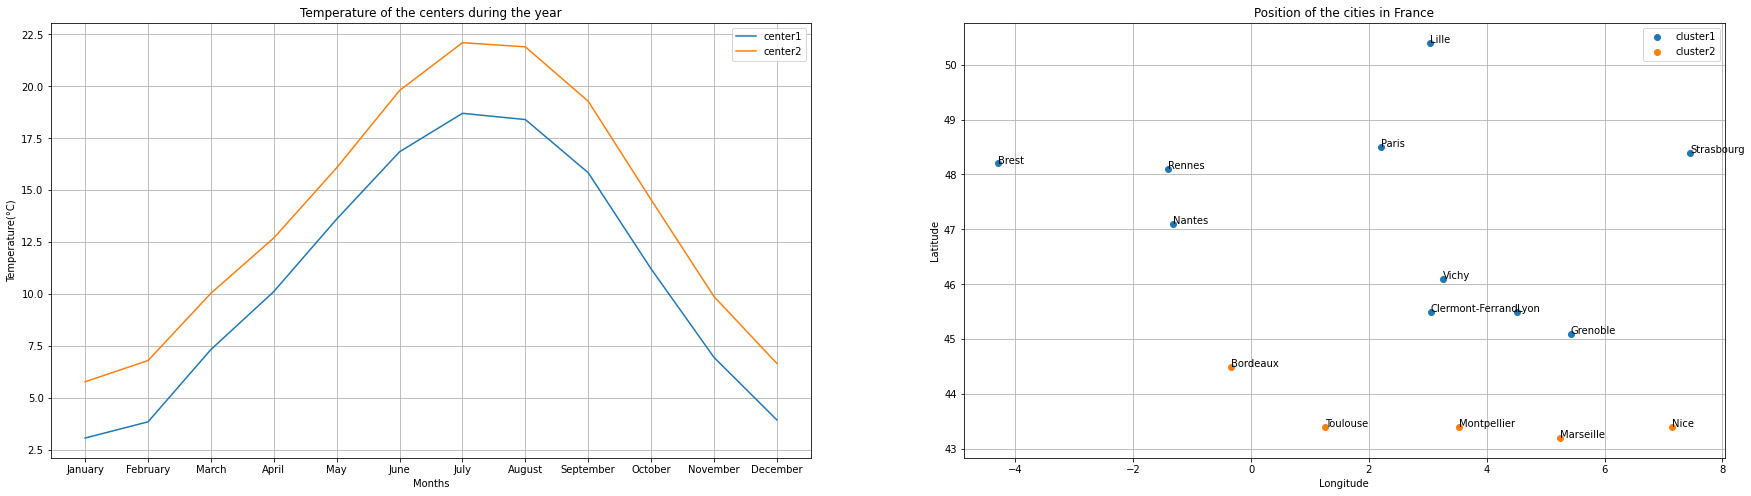

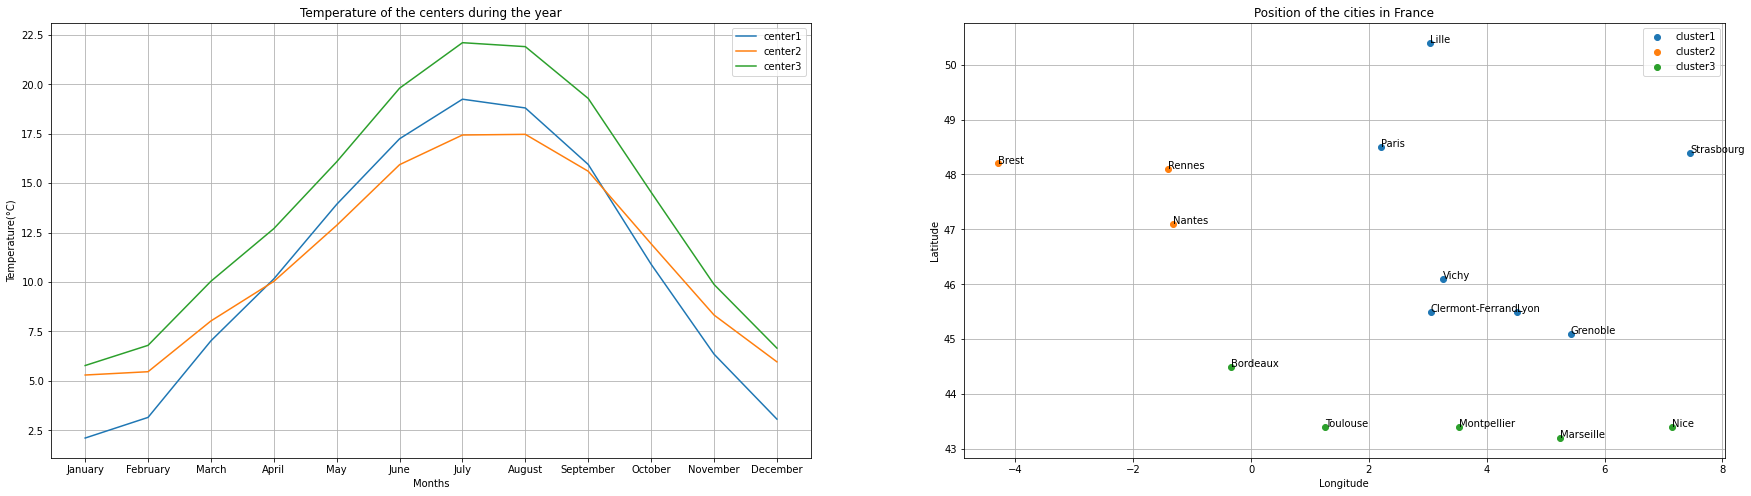

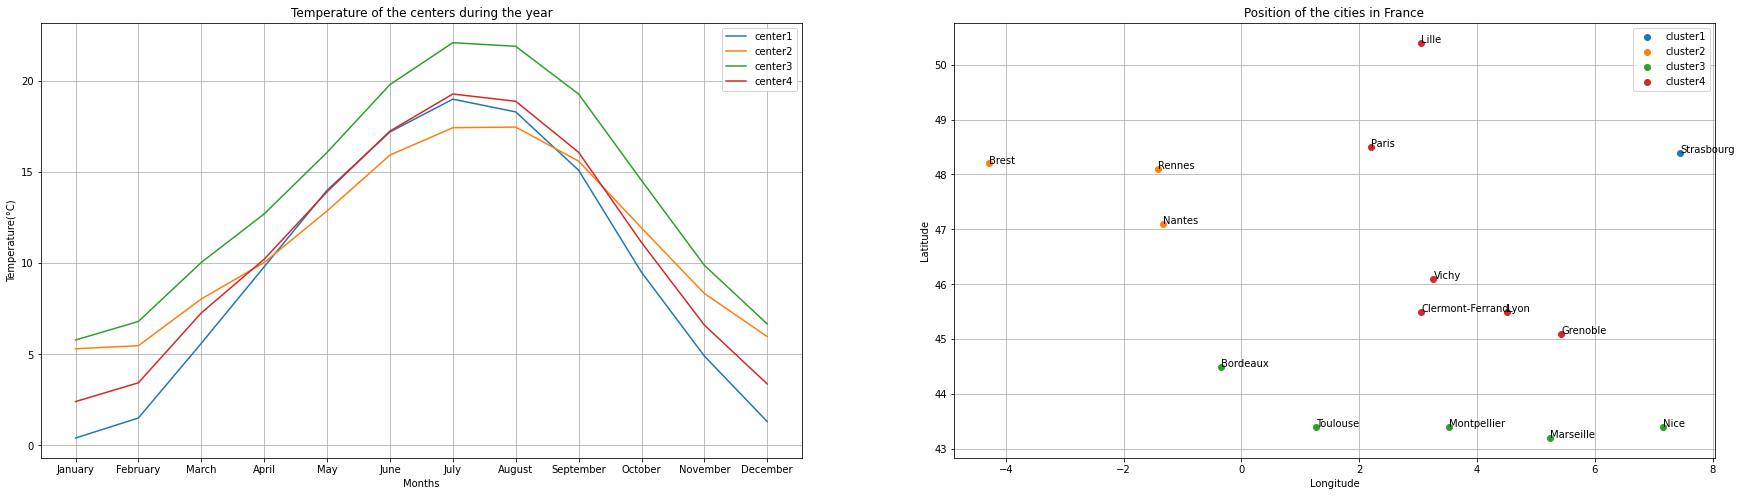

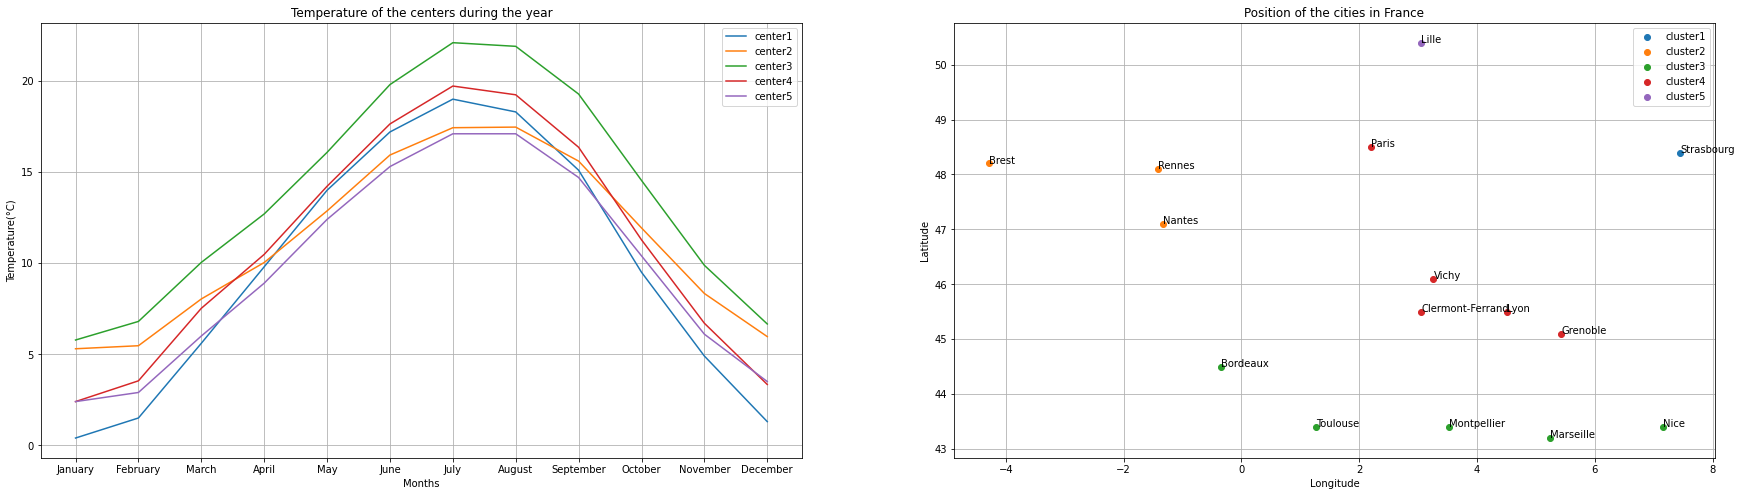

In [40]:
# Changing the shape of the covariance
for K in range(2,6):
  GMM_temper = GaussianMixture(n_components=K,covariance_type='full',random_state=0)
  GMM_temper.fit(x1)

  # Getting estimated parameters
  mus = GMM_temper.means_
  sigmas = GMM_temper.covariances_
  phi = GMM_temper.weights_

  # predicting cluster class
  temper_pred_clusters_GMM = GMM_temper.predict(x1)

  
  fig, (ax, ax1) = pl.subplots(1,2,figsize=(30,8))
  # Plotting the mean and the standard deviation of each Gaussian distribution in the mixture
  for k in range(K):
    ax.plot(varnames[:12],mus[k,:],label=f'center{k+1}')
    #ax.fill_between(varnames[:12],mus[k,:]+sigmas[k,:],mus[k,:]-sigmas[k,:],alpha=0.5)
  
  ax.set_title('Temperature of the centers during the year')
  ax.set_xlabel('Months')
  ax.set_ylabel('Temperature(°C)')
  ax.legend()
  ax.grid()
  # Plotting the cities with a scatterplot using their geographical position and using the estimated class as color
  for i in range(K):
    ax1.scatter(data[temper_pred_clusters_GMM==i,13] ,data[temper_pred_clusters_GMM==i,12],label=i)
  for i, txt in enumerate(villes):
    ax1.annotate(txt, (data[:,13][i],data[:,12][i]))
  ax1.set_title('Position of the cities in France')
  ax1.set_xlabel(varnames[13])
  ax1.set_ylabel(varnames[12])
  ax1.legend([f'cluster{i+1}' for i in range(K)])
  ax1.grid()

> **Comments:**<br>
when we change the covariance_type matrix from 'diag' to 'full', we don't notice a change in the centers temperature plots or in the result of clustering. So since the clustering remains the same, it is better to use diagonal covariances because the data is high dimention.




In [41]:
# Displaying the log probability of the samples for the estimated density 
K=2
GMM_temper = GaussianMixture(n_components=K,covariance_type='diag')
GMM_temper.fit(x1)
print('The sorted vector of log probabilities of the samples for the estimated density :\n',np.sort(GMM_temper.score_samples(x1)))

The sorted vector of log probabilities of the samples for the estimated density :
 [-30.66152562 -23.88056866 -21.49078828 -20.62541895 -20.24013377
 -18.44314441 -17.20816322 -16.06967722 -14.98650196 -13.12603521
 -13.02102214 -12.74903446 -12.63133605 -12.43200276  -9.92980207]


- Basing on the displayed sorted vector of log probabilities of the estimated density, we can consider a density threshold which is equal to -20 which means that samples having log probability which is inferior to this threshold are considered as outiliers.

In [42]:
density_threshold = -20
log_proba_GMM = GMM_temper.score_samples(x1)
n_samples_lowest_proba = x1[log_proba_GMM< density_threshold].shape[0]
n_lowest_proba_index =np.argsort(GMM_temper.score_samples(x1))[:n_samples_lowest_proba]

In [43]:
data_without_outliers = data.copy()
data_without_outliers = np.delete(data_without_outliers,tuple(n_lowest_proba_index), axis=0)

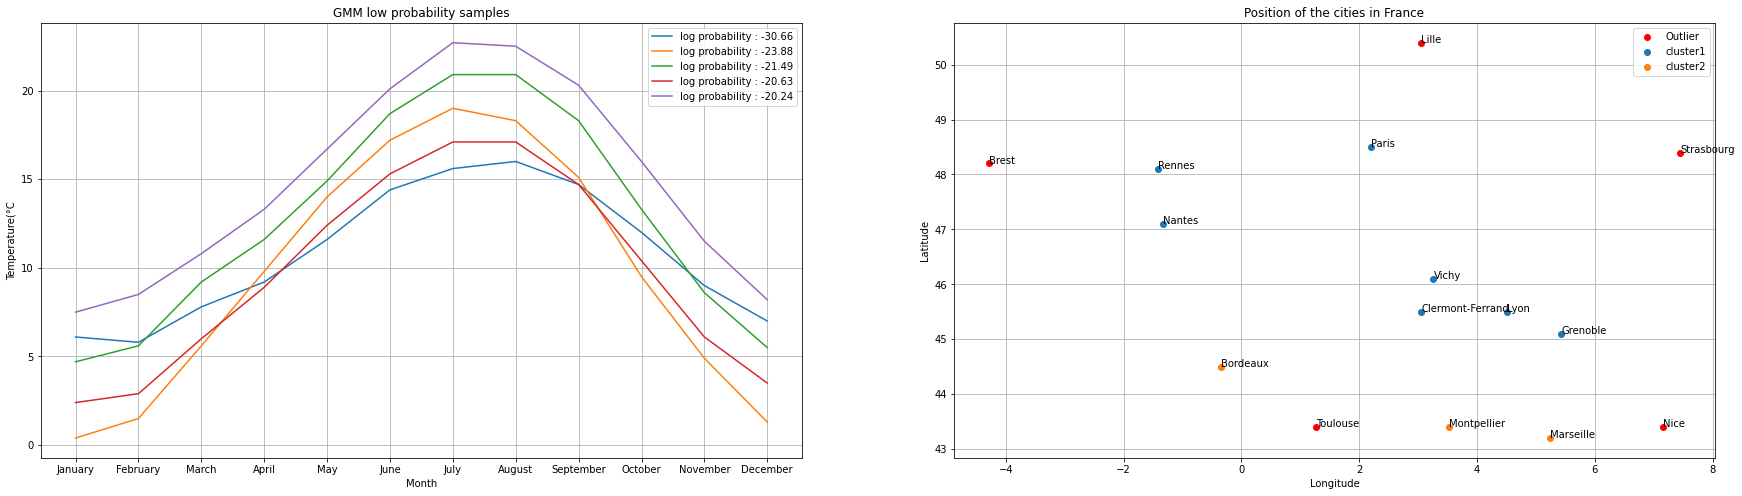

In [44]:
fig, (ax, ax1) = pl.subplots(1,2,figsize=(30,8))

for i in n_lowest_proba_index :
  ax.plot(varnames[:12],x1[i,:].T, label=f'log probability : {np.round(log_proba_GMM[i],2)}')
ax.set_title('GMM low probability samples')
ax.set_xlabel('Month')
ax.set_ylabel('Temperature(°C')
ax.legend()
ax.grid()

data_without_outliers = data.copy()
data_without_outliers = np.delete(data_without_outliers,tuple(n_lowest_proba_index), axis=0)
temper_pred_clusters_withoutOutliers = GMM_temper.predict(data_without_outliers[:,:12])
ax1.scatter(data[n_lowest_proba_index][:,13], data[n_lowest_proba_index][:,12], color='red', label='Outlier')
for i in range(K):
  ax1.scatter(data_without_outliers[temper_pred_clusters_withoutOutliers==i,13] ,data_without_outliers[temper_pred_clusters_withoutOutliers==i,12],label=f'cluster{i+1}')
for i, txt in enumerate(villes):
  ax1.annotate(txt, (data[:,13][i],data[:,12][i]))
ax1.set_title('Position of the cities in France')
ax1.set_xlabel(varnames[13])
ax1.set_ylabel(varnames[12])
ax1.legend()
ax1.grid()

> **Comments:**<br>
The figure above shows that the samples with the smallest probability are either warm ( samples whose cities are Toulouse and Nice), either cold (samples whose cities are Brest and Lille) or having medium temperature values (the sample whose city is strastbourg). So the cities correspond to these outliers are located on the edge of the map which means that they have temperature values that are very far from the other samples and thus can leads to mistaken the results of clustering.

- **Digits dataset**

In [51]:
K = 3
GMM_digits = GaussianMixture(n_components=K,covariance_type='diag')
GMM_digits.fit(x2)
digits_pred_clusters_GMM = GMM_digits.predict(x2)

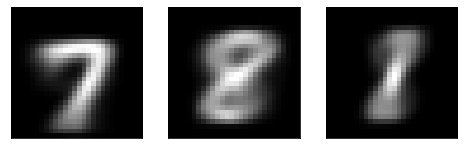

In [46]:
# Plotting the centroids for the digits dataset
fig, ax = pl.subplots(1, K, figsize=(8, 3))
centers = GMM_digits.means_.reshape(K, 28, 28)
for axi, center in zip(ax.flat, centers):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

> **Comments:**<br>
As in K-means, we obtain blurry images thaat correspond to the three classes.
So the samples are clustered by class. 

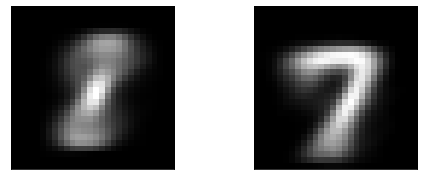

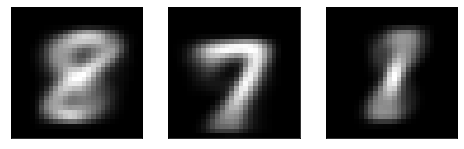

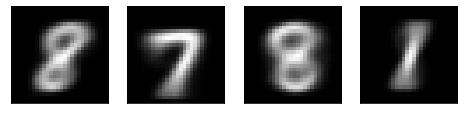

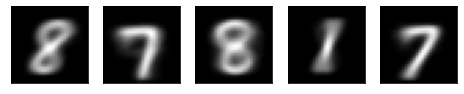

In [47]:
# Changing the value of K
for K in range(2,6):
  GMM_digits_K = GaussianMixture(n_components=K,covariance_type='diag', random_state=0)
  GMM_digits_K.fit(x2)
  fig, ax = pl.subplots(1, K, figsize=(8, 3))
  centers_K = GMM_digits_K.means_.reshape(K, 28, 28)
  for axi, center in zip(ax.flat, centers_K):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

> **Comments:** <br>
We obtain the same conclusion as in K-means which is that K=3 allows us to obtain clusters for each class and that increasing the value of k from 3 to higher values leads to the appearance of clusters that correspond to different ways of handwritten of the digits.

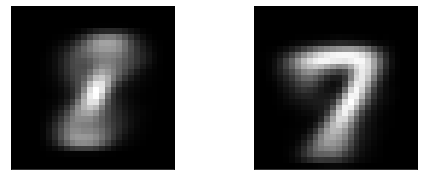

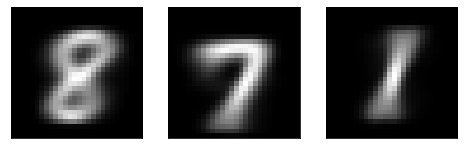

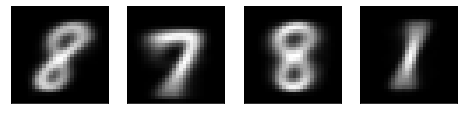

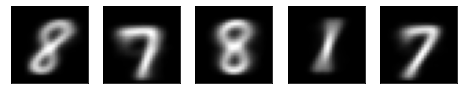

In [48]:
# Changing the shape of the covariance
for K in range(2,6):
  GMM_digits_K = GaussianMixture(n_components=K,covariance_type='full', random_state=0)
  GMM_digits_K.fit(x2)
  fig, ax = pl.subplots(1, K, figsize=(8, 3))
  centers_K = GMM_digits_K.means_.reshape(K, 28, 28)
  for axi, center in zip(ax.flat, centers_K):
    axi.set(xticks=[], yticks=[])
    axi.imshow(center, cmap='gray')

> **Comments:**<br>
We don't see a difference in the center images for different values of K after Changing the covariance_type from 'diag' to 'full'. So due to the very high dimention of the data, we need to set covariance_type to 'diag' in order to reduce the number of estimated parameters(it facilitates the calculations)

In [52]:
# Computing log probability of the samples for the estimated density
print('The sorted vector of log probabilities of the samples for the estimated density :\n',np.sort(GMM_digits.score_samples(x2)))

The sorted vector of log probabilities of the samples for the estimated density :
 [-10700.67504777  -7579.49157392  -4860.90622559 ...   2728.51072116
   2728.57035339   2733.93712655]


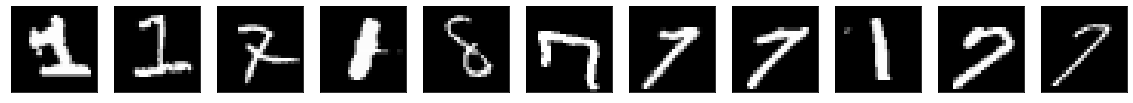

In [56]:
anomalies_digits = x2[GMM_digits.score_samples(x2) < 0]
n_Dsamples_lowest_proba = anomalies_digits.shape[0]
n_lowest_proba_Dindex =np.argsort(GMM_digits.score_samples(x2))[:n_Dsamples_lowest_proba]
outliers = x2[n_lowest_proba_Dindex]

fig, ax = pl.subplots(1, n_Dsamples_lowest_proba, figsize=(20, 5))
for i in range(n_Dsamples_lowest_proba):
  ax[i].set(xticks=[], yticks=[])
  ax[i].imshow(outliers[i,:].reshape(28,28), cmap='gray')

> **Comments:**<br>
Since the sorted vector of log probabilities for the estimated density have only 11 negatif values I have considered 0 as the threshold of density and thus I obtained 11 outliers that are displayed in the figure above.These outliers which were detected by the GM model are blurry images which some of them doesn't look like any handwriten digit.

In [57]:
# Displaying the clustering rand scores 
print('- The rand index is given by : ', rand_score(y2.reshape(-1),digits_pred_clusters_GMM))
print('- The adjusted rand index is given by :', adjusted_rand_score(y2.reshape(-1),digits_pred_clusters_GMM))

- The rand index is given by :  0.7615936423252195
- The adjusted rand index is given by : 0.48064532426789625


In [58]:
# Remooving outliers and computing clustering scores
x2_without_outliers = x2.copy()
x2_without_outliers = np.delete(x2_without_outliers,tuple(n_lowest_proba_Dindex ), axis=0)
y2_without_outliers = y2.copy()
y2_without_outliers = np.delete(y2_without_outliers,tuple(n_lowest_proba_Dindex ), axis=0)
digits_pred_clusters_withoutOutliers = GMM_digits.predict(x2_without_outliers)
# Displaying the clustering rand scores 
print('- The rand index is given by : ', rand_score(y2_without_outliers.reshape(-1),digits_pred_clusters_withoutOutliers))
print('- The adjusted rand index is given by :', adjusted_rand_score(y2_without_outliers.reshape(-1),digits_pred_clusters_withoutOutliers))

- The rand index is given by :  0.7626513637912865
- The adjusted rand index is given by : 0.48282747127876685


> **Comments:**<br>
Even after, removing outliers the rand scores values doesn't increase. We obtain scores that are way smaller than the ones obtained by K-means. So we can conclude that K-means gives better performance than the GMM model.
The reason behind this is that when using the GMM model we are assuming that the data is Gaussian and we want to find parameters that maximize the likelihood of observing this data and even though this assumption is rather satisfied when we have a lot of data (central limit theorem) we don't need to do this assumption in case of the digit classification and we also don't need to take into consideration the covariance of our data because minimizing euclidian distances used by K-means leads to more accurate clustering which means to less misclassified samples.<br>
$\Longrightarrow$ To conclude the fact that GMM uses the assumption of gaussian data and uses more parameters (covariance) leads to worse perdormance comparing to K-means that doesn't use any assumption on data and that needs much more less parameters.

In [59]:
# Generating samples from distribution
n_generated_samples = 50
K = 3
GMM_digits = GaussianMixture(n_components=K,covariance_type='diag')
GMM_digits.fit(x2)
xg =GMM_digits.sample(n_generated_samples)

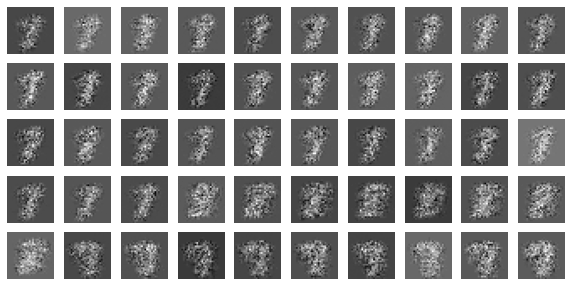

In [60]:
number_rows = 5
number_columns = 10
fig,ax=pl.subplots(figsize=(10,5))
pl.axis('off')
for i in range(1,number_rows*number_columns+1):
    fig.add_subplot(number_rows,number_columns,i)
    pl.imshow(xg[0][i-1,:].reshape(28,28), cmap='gray')
    pl.axis('off')

> **Comments:** <br>
The generated samples can be easily differentiated from real data since they are very noisy.


# 4 Dimensionality reduction

## 4.1 Linear Projection : Principal Component Analysis

- **Temperature dataset** 


Text(0.5, 1.0, 'Covariance matrix of the temperature data matrix')

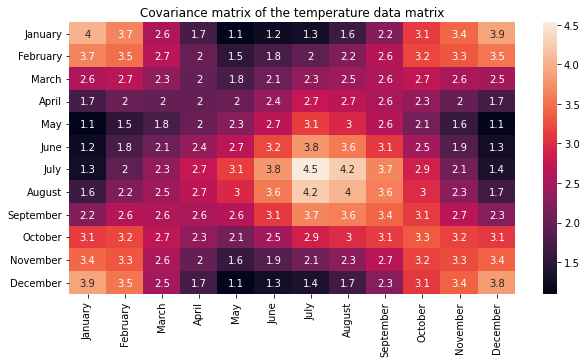

In [61]:
# plotting a heatmap of the covariance matrix
cov_matrix_temper = np.cov(x1.T)
pl.figure(figsize=(10,5))
sns.heatmap(cov_matrix_temper, annot=True, yticklabels=varnames[:12], xticklabels=varnames[:12])
pl.title('Covariance matrix of the temperature data matrix')

> **Comments:** <br>
We notice that the darkest squares in the covariance matrix correspond to  weak correlations between december and each of the months May, June, July and August which are the summer months. These dark squares correspond also to correlation between January and summer months.This can be explained by the fact that december or january are not close in time to the summer months.
So the more the months are far away in time the less is the correlation which makes sens. So it is logical that the bright regions corresponds to correlations between consecutif months or months that are not very far way in time.


The vector of explained variance ratios is given by : 
 [7.83110305e-01 2.06569899e-01 4.84535068e-03 2.79489336e-03
 1.14488366e-03 6.57394899e-04 5.57874105e-04 1.40975158e-04
 1.10823960e-04 4.29735573e-05 2.29442453e-05 1.68278390e-06]


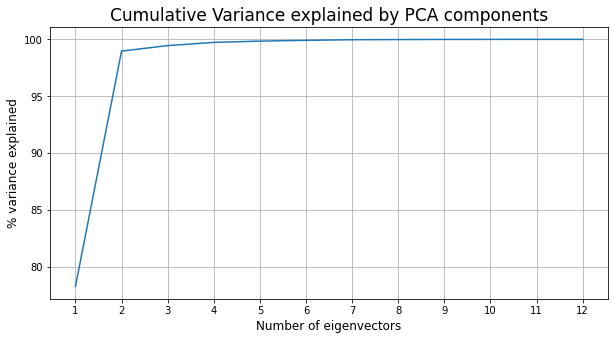

In [62]:
# Computing PCA
pca_temper = PCA(n_components=None, random_state=1) # by fixing the random_state we are sure that results are always the same
pca_temper.fit(x1)
var_explained_pca_temper = pca_temper.explained_variance_ratio_
# Displaying the variance ratio explained by each direction 
print('The vector of explained variance ratios is given by : \n',var_explained_pca_temper)
pl.figure(figsize=(10, 5))
x_axis = np.arange(1,pca_temper.n_components_+1)
pl.plot(x_axis,np.cumsum(var_explained_pca_temper)*100)
pl.xticks(x_axis)
pl.title('Cumulative Variance explained by PCA components',fontsize=17)
pl.xlabel('Number of eigenvectors',fontsize=12)
pl.ylabel('% variance explained',fontsize=12)
pl.grid()

> **Comments:**<br>
- The figure above shows that the percentage of cumulative variance explained by PCA components increases until it reaches its maximum (100%)at p=5 and from p=5 it remains constant.
- When projecting on p=2, we preserve 98,9% of the initial information.


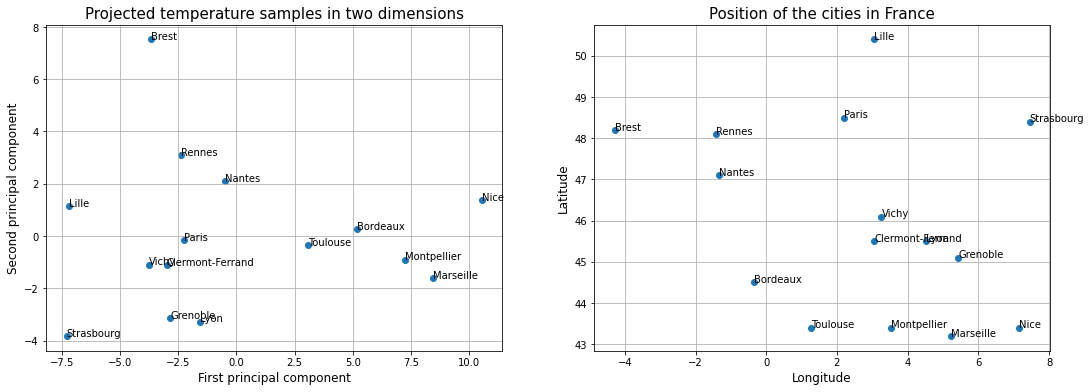

In [63]:
# Projecting the samples in p=2 dimensions
p=2
x1_pca=pca_temper.transform(x1)[:,:p]
# To better see if the preserved information is correlated to the geographical position of the samples I'm going to plot a subplot of  the projected samples and the position of cities in France
fig, (ax, ax1) = pl.subplots(1,2,figsize=(18,6))

ax.scatter(x1_pca[:,0],x1_pca[:,1])
for i in range(len(villes)):
  ax.text(x1_pca[i,0],x1_pca[i,1],villes[i])
ax.set_title('Projected temperature samples in two dimensions',fontsize=15)
ax.set_xlabel('First principal component',fontsize=12)
ax.set_ylabel('Second principal component',fontsize=12)
ax.grid()

ax1.scatter(data[:,13], data[:,12])
for i in range(len(villes)):
  ax1.text(data[:,13][i],data[:,12][i],villes[i])
ax1.set_title('Position of the cities in France',fontsize=15)
ax1.set_xlabel(varnames[13],fontsize=12)
ax1.set_ylabel(varnames[12],fontsize=12)
ax1.grid()


> **Comments:**<br>
When comparing the projected samples in two dimentions with the position of the cities, we notice that the geographical information is preserved since the first principal direction allows us to differentiate north-south cities and the second principal direction allows us to distinguish est-west cities.

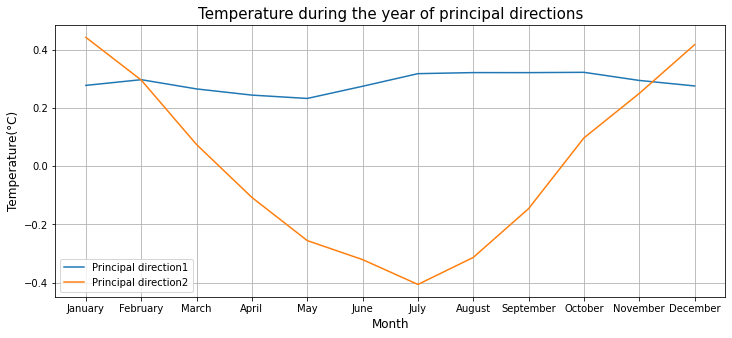

In [64]:
# Getting the two first principal directions
pl.figure(figsize=(12,5))
for p in range(2):
  pl.plot(varnames[:12],pca_temper.components_[p], label=f'Principal direction{p+1}')

pl.title('Temperature during the year of principal directions',fontsize=15)
pl.xlabel('Month',fontsize=12)
pl.ylabel('Temperature(°C)',fontsize=12)
pl.legend()
pl.grid()

> **Comments:**<br>
For the first principal direction, there isn't a big variation in the temperature during the year whereas the second principal direction encodes this variation of temperature during the year since it has a temperature curve which is an inverted bell curve that illustrates the separation between the four seasons of the years in terms of temperature.

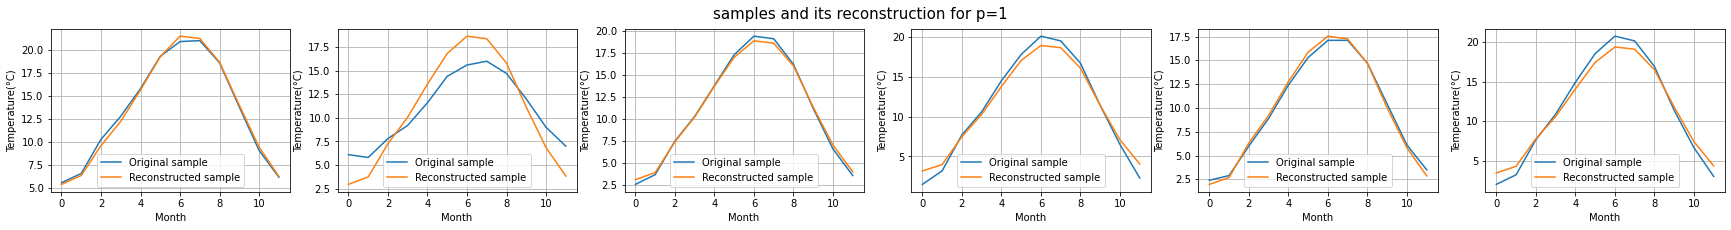

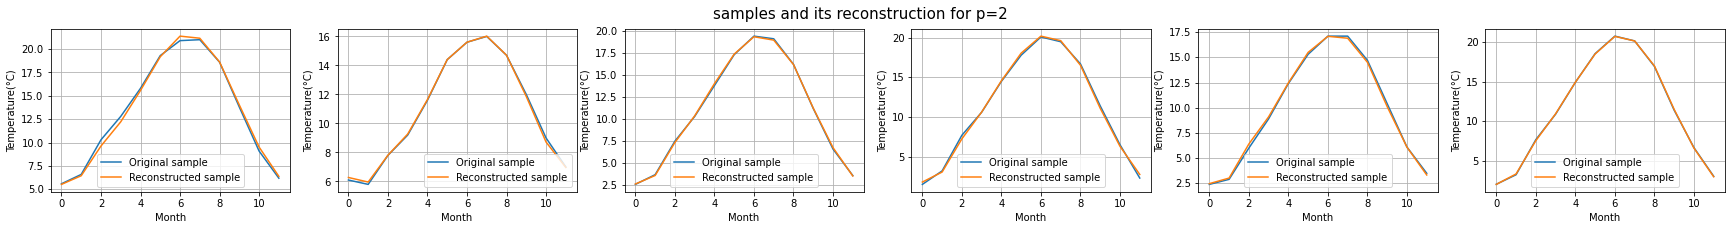

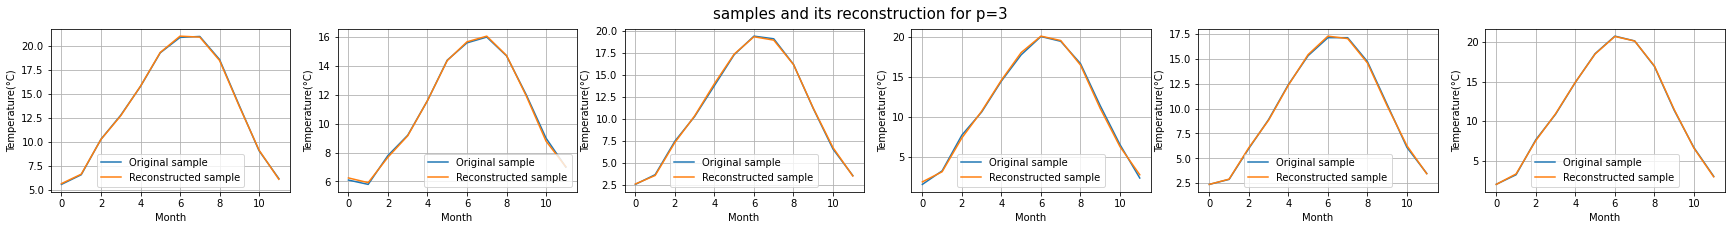

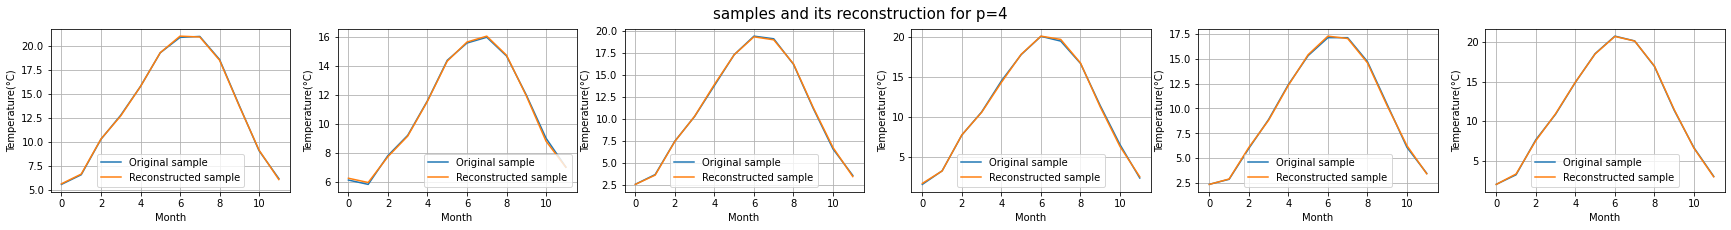

In [65]:
n_samples = 6
for p in range(1,5):
  pca_temper_p = PCA(n_components=p, random_state=1)
  xp_temper = pca_temper_p.fit_transform(x1)
  # Reconstructing the data from the projected samples
  x_recpnstructed_temper = pca_temper_p.inverse_transform(xp_temper)
  # Plotting few samples and its reconstruction
  fig, axs= pl.subplots(1,n_samples,figsize=(30,3))
  pl.suptitle(f'samples and its reconstruction for p={p}',fontsize=15)
  for i in range(n_samples):
    axs[i].plot(x1[i],label='Original sample')
    axs[i].plot(x_recpnstructed_temper[i],label='Reconstructed sample')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Temperature(°C)')
    axs[i].legend()
    axs[i].grid()

> **Comments:**<br>
The figures above show that the more p increases the better is the quality of reconstruction and this is make sens since the more p increases the more information is preserved so the more the reconstruction tends to be perfect.
As we can see, for p=1 the reconstruction error is high since the two curves are far from each other for some samples. Starting from p=2, the reconstruction error decreases considerably aleading to a better quality.


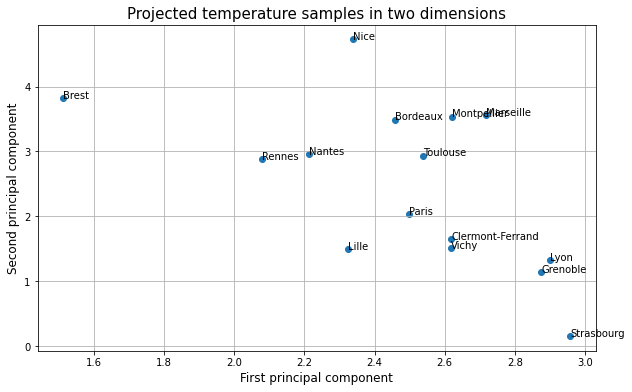

In [66]:
# NMF
p=2
nmf_temper = NMF(n_components=p,init='random',random_state=1)
nmf_temper.fit(x1)
# Projecting the samples in p=2 dimensions
x1_nmf=nmf_temper.transform(x1)

pl.figure(figsize=(10,6))
pl.scatter(x1_nmf[:,0],x1_nmf[:,1])
for i in range(len(villes)):
  pl.text(x1_nmf[i,0],x1_nmf[i,1],villes[i])
pl.title('Projected temperature samples in two dimensions',fontsize=15)
pl.xlabel('First principal component',fontsize=12)
pl.ylabel('Second principal component',fontsize=12)
pl.grid()

> **Comments:**<br>
We notice that the geographical information is preserved when projection using NMF since the cities that are close are represented by samples that are close but we cannot clearly see the different clusters.

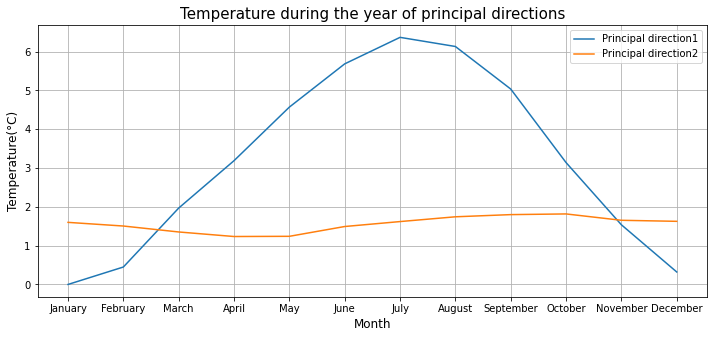

In [67]:
# plotting the two first principl components
pl.figure(figsize=(12,5))
for i in range(p):
  pl.plot(varnames[:12],nmf_temper.components_[i], label=f'Principal direction{i+1}')

pl.title('Temperature during the year of principal directions',fontsize=15)
pl.xlabel('Month',fontsize=12)
pl.ylabel('Temperature(°C)',fontsize=12)
pl.legend()
pl.grid()

>**Comments:**<br>
We obtain for both principal directions curves in which the temperature values are all positive. Similarly to PCA directions, there is one direction that encodes the large variation which is the first principal component since it has bell curve similar to the shape of those of the samples.

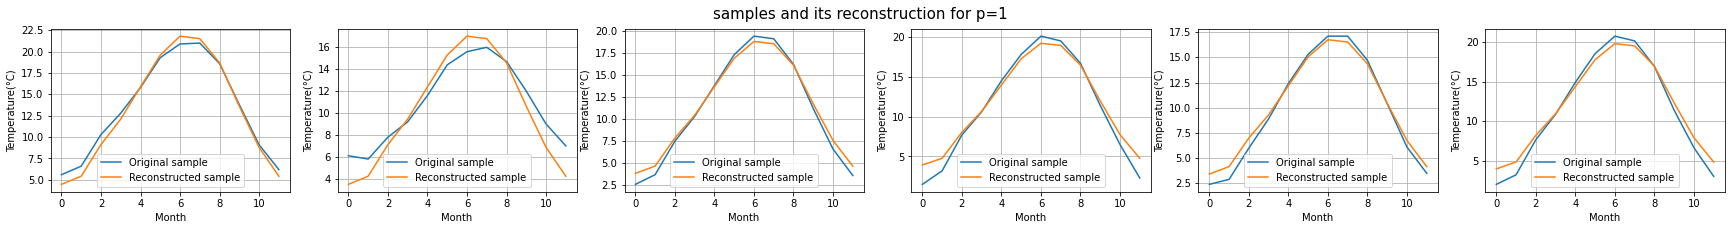

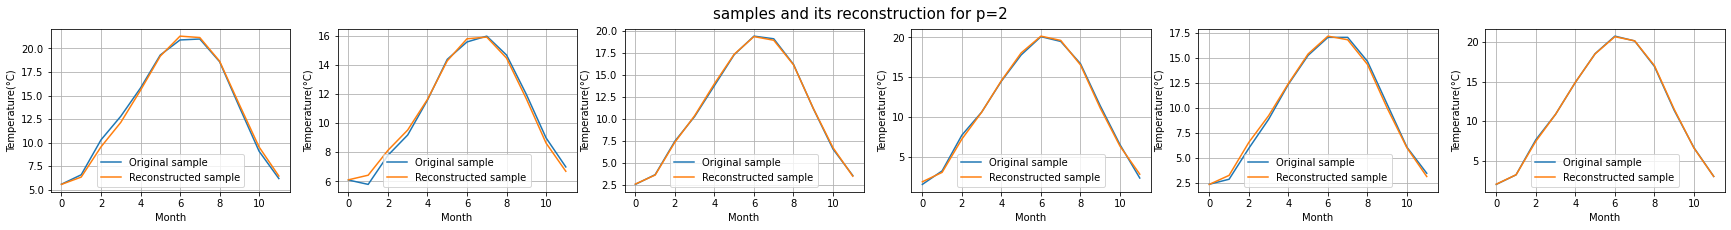

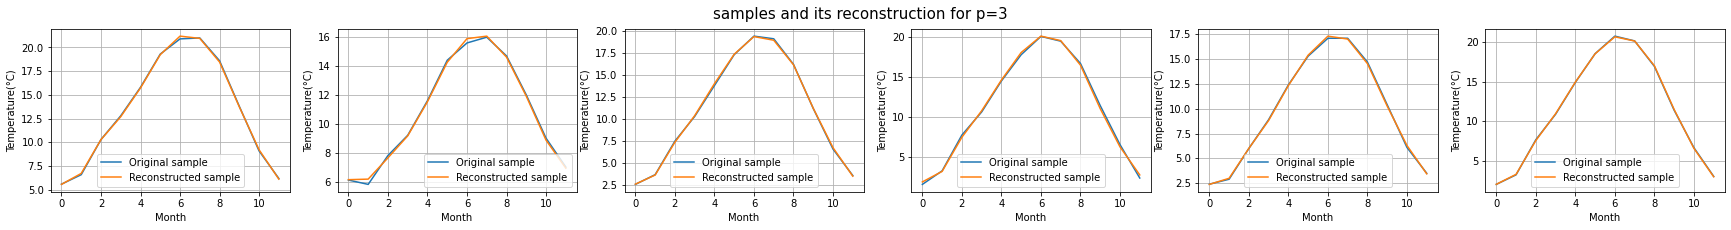

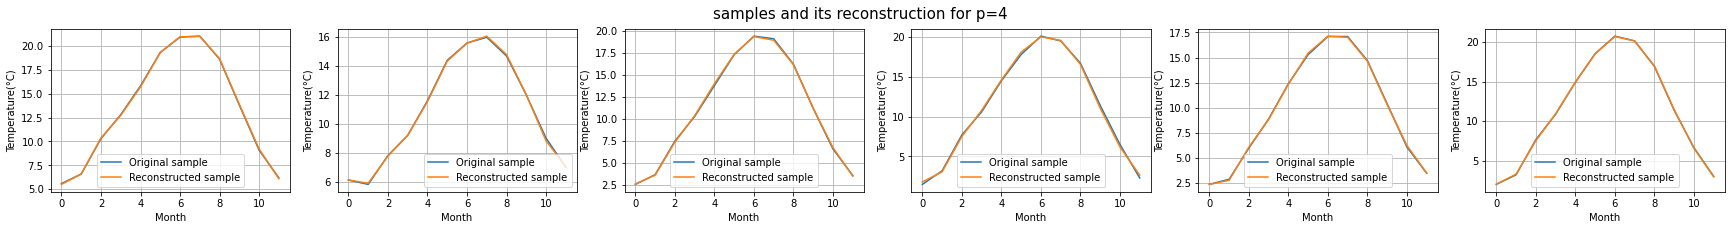

In [68]:
n_samples = 6
for p in range(1,5):
  nmf_temper_p = NMF(n_components=p, init='random',random_state=1, max_iter=2000)
  xp_temper = nmf_temper_p.fit_transform(x1)
  # Reconstructing the data from the projected samples
  x_reconstructed_temper = nmf_temper_p.inverse_transform(xp_temper)
  # Plotting few samples and its reconstruction
  fig, axs= pl.subplots(1,n_samples,figsize=(30,3))
  pl.suptitle(f'samples and its reconstruction for p={p}',fontsize=15)
  for i in range(n_samples):
    axs[i].plot(x1[i],label='Original sample')
    axs[i].plot(x_reconstructed_temper[i],label='Reconstructed sample')
    axs[i].set_xlabel('Month')
    axs[i].set_ylabel('Temperature(°C)')
    axs[i].legend()
    axs[i].grid()

> **Comments:**<br>
As we can see, there isn't a difference between the quality of reconstruction of PCA and NMF since starting from p=2 the quality increases due to the oncrease of the preserved quantity of information.

- **Digits dataset**

Text(0.5, 1.0, 'Covariance matrix of the digits data matrix')

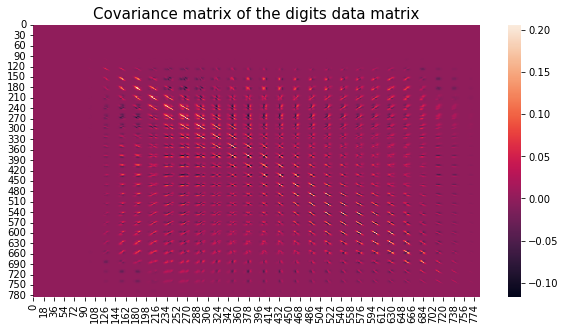

In [69]:
# Plotting a heatmap of the covariance matrix
cov_matrix_digits = np.cov(x2.T)
pl.figure(figsize=(10,5))
sns.heatmap(cov_matrix_digits, annot=False)
pl.title('Covariance matrix of the digits data matrix',fontsize=15)

> **Comments:**<br>
the light squares in the covariance matrix correspond to pixels that are both white or both black so the white and the black zones in a sample are represented by light squares in the covariance matrix whereas the edges that represents zones where pixels changes colour are represented by dark squares in the covariance matrix.


percentage of Cumulative variance explained by the second PCA component is 26.950577944312332


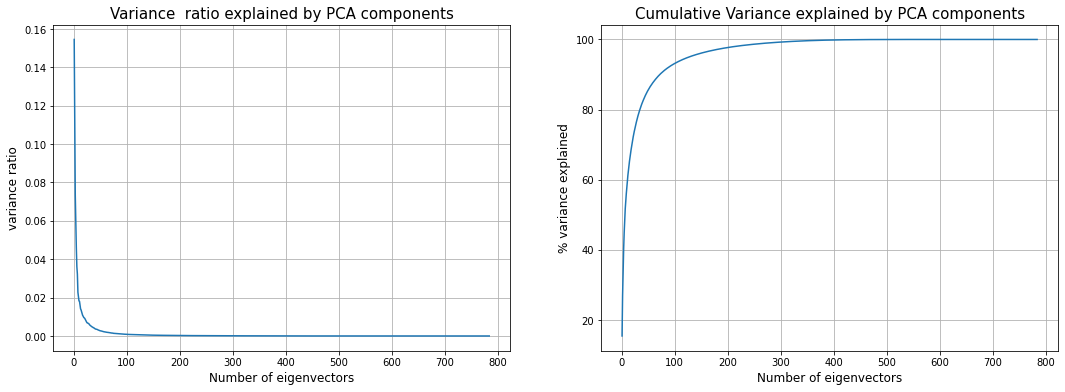

In [70]:
# Computing PCA
pca_digits = PCA(n_components=None, random_state=1) 
pca_digits.fit(x2)
var_explained_pca_digits = pca_digits.explained_variance_ratio_

# Instead of displaying the vector of explained variance ratio (high dimentional vector dim=784)I'm going to plot the explained variance ratio 
fig, (ax,ax1)= pl.subplots(1,2,figsize=(18,6))
x_axis = np.arange(1,pca_digits.n_components_+1)
ax.plot(x_axis,var_explained_pca_digits)
ax.set_title('Variance  ratio explained by PCA components',fontsize=15)
ax.set_xlabel('Number of eigenvectors',fontsize=12)
ax.set_ylabel('variance ratio',fontsize=12)
ax.grid()

ax1.plot(x_axis,np.cumsum(var_explained_pca_digits)*100)
ax1.set_title('Cumulative Variance explained by PCA components',fontsize=15)
ax1.set_xlabel('Number of eigenvectors',fontsize=12)
ax1.set_ylabel('% variance explained',fontsize=12)
ax1.grid()
print('percentage of Cumulative variance explained by the second PCA component is',np.cumsum(var_explained_pca_digits)[1]*100)

> **Comments:**<br>
- We notice that percentage of cumulative explained variance increases slowly comparing to the temperature dataset and this is due to the high dimentionality of the data. So in order to preserve more than 90% we need a high value of p (around 90).
- for p=2, the percentage of cumulative explained variance is 26.95% which is a low percentage that doesn't allow to have projected samples of good quality.


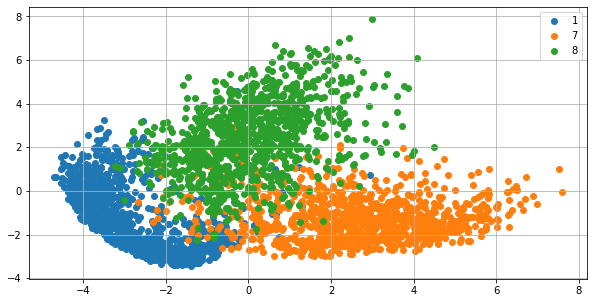

In [71]:
# Projecting the samples in p=2 dimensions
p=2
x2_pca=pca_digits.transform(x2)[:,:p]
# Plotting the projected samples and color them with their class
pl.figure(figsize=(10,5))
dictionary = {'1':(0,1000),'7':(1000,2000),'8':(2000,3000)}# Creating a dictionary in which the keys are the classes and the values are tuples containing the indexes of the samples in the dataset
for key, value in dictionary.items():
  pl.scatter(x2_pca[value[0]:value[1],0],x2_pca[value[0]:value[1],1], label=key)
pl.legend()
pl.grid()

> **Comments:**<br>
- The projection preserve the information of classes since we can clearly see the different classes in the plot of the projected samples in 2 dimensions in spite of the overlap that exists between the classes. 
- We notice that the class 7 is characterized by positive values along the first principal direction whereas the projected samples of class 1 have negatif values along this same direction and the samples of the class 8 have positive values on the second principal direction.


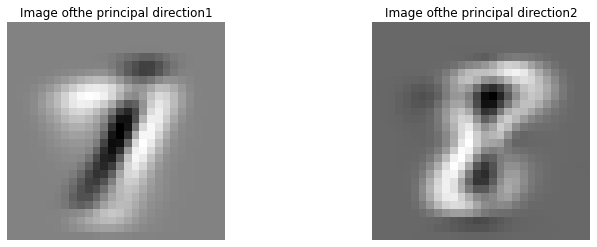

In [72]:
# Getting the two first principal directions
fig, axs = pl.subplots(1, p, figsize=(12,4))
for i in range(p):
  axs[i].imshow(pca_digits.components_[i].reshape(28,28),cmap='gray')
  axs[i].set_title(f'Image ofthe principal direction{i+1}')
  axs[i].axis('off')
 

> **Comments:**<br>
- We notice that the first principal direction is an image that is close to the class 7 which means to have samples belonging to class 7 we need positive weights to be multiplied by the first principal direction and this confirms the analyse of the projected samples plot where we concluded that samples of class 7 have positive weights along the first direction.
- The Second principal component is an image that is close to the class 8 which means that projected samples of class 8 should have positive weights along the second direction which confirms our observation in the projected samples plot.


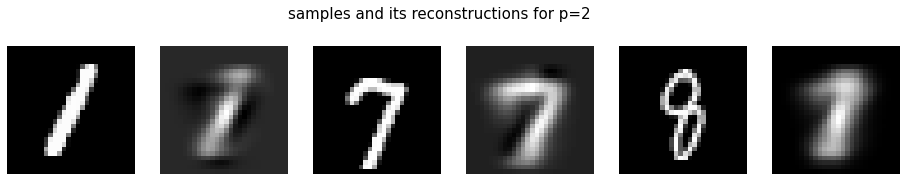

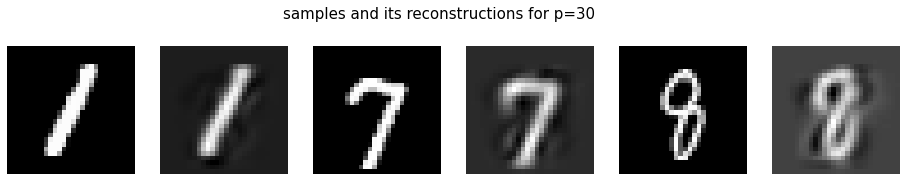

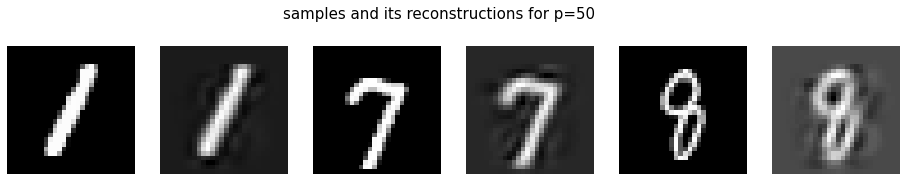

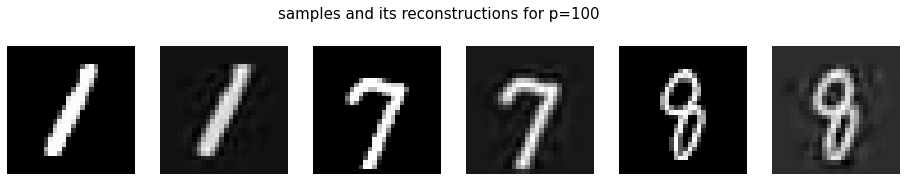

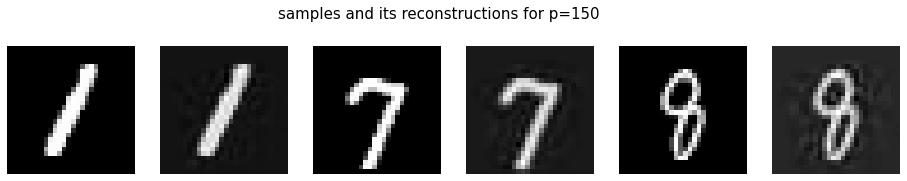

In [73]:
samples_indices = [100,1500,2500] # choosing indices such that we get a sample from each class
list_components = [2,30,50,100,150]
for p in list_components:
  pca_digits_p = PCA(n_components=p, random_state=1)
  xp_digits = pca_digits_p.fit_transform(x2)
  # Reconstructing the data from the projected samples
  x_reconstructed_digits = pca_digits_p.inverse_transform(xp_digits)
  # Visualizing few samples and its reconstruction
  fig, axs = pl.subplots(1, 2*len(samples_indices), figsize=(16,3))
  pl.suptitle(f'samples and its reconstructions for p={p}',fontsize=15)
  for i in range(0,2*len(samples_indices),2):
    axs[i].imshow(x2[samples_indices[i//2]].reshape(28,28), cmap='gray')
    axs[i+1].imshow(x_reconstructed_digits[samples_indices[i//2]].reshape(28,28), cmap='gray')
    axs[i].axis('off')
    axs[i+1].axis('off')
  

> **Comments:**<br>
For p=1, the reconstructed images have bad quality since they are too noisy and blurry.The more p increases the more the reconstructed images become clearer so we achieve a good quality for high values of p for instance p=100 and p=150.


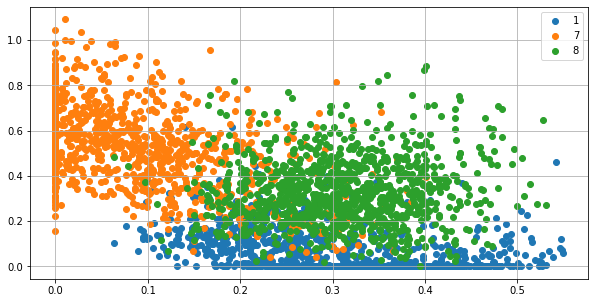

In [74]:
################################### NMF###################################################################
p=2
nmf_digits = NMF(n_components=p,init='random',random_state=1)
nmf_digits.fit(x2)
# Projecting the samples in p=2 dimensions
x2_nmf=nmf_digits.transform(x2)
# Plotting the projected samples and color them with their class
pl.figure(figsize=(10,5))
dictionary = {'1':(0,1000),'7':(1000,2000),'8':(2000,3000)}# Creating a dictionary in which the keys are the classes and the values are tuples containing the indexes of the samples in the dataset
for key, value in dictionary.items():
  pl.scatter(x2_nmf[value[0]:value[1],0],x2_nmf[value[0]:value[1],1], label=key)
pl.legend()
pl.grid()

> **Comments:**<br>
In the case of NMF, all the coefficients along the two axis are positive.We notice that many samples of the class 1 have are entirely represented by the first direction (since they have value 0 on the second direction) also there is many samples of class 7 are entirely represented by the second direction. In addition, the samples of different classes are much less separated copared to the projection using the PCA.


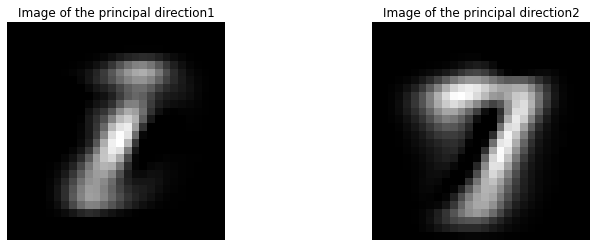

In [75]:
# The two principal directions
fig, axs = pl.subplots(1, p, figsize=(12,4))
for i in range(p):
  axs[i].imshow(nmf_digits.components_[i].reshape(28,28),cmap='gray')
  axs[i].set_title(f'Image of the principal direction{i+1}')
  axs[i].axis('off')

> **Comments:**<br>
the principal components correspond to images of 1 and 7. Confirmly to our observation in the scatter plot the first direction which is an image of 1 characterises projected samples of class 1 and the second direction characterises samples of class 7.

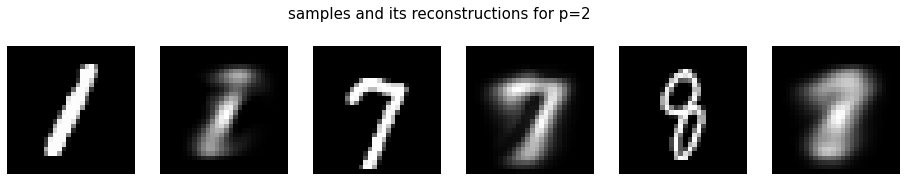

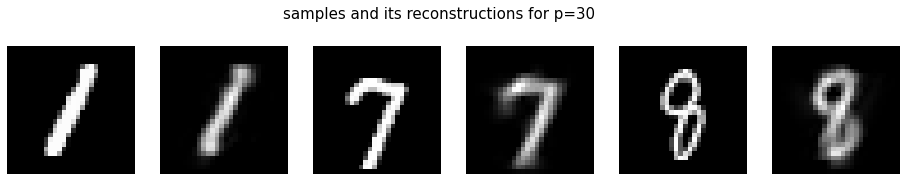

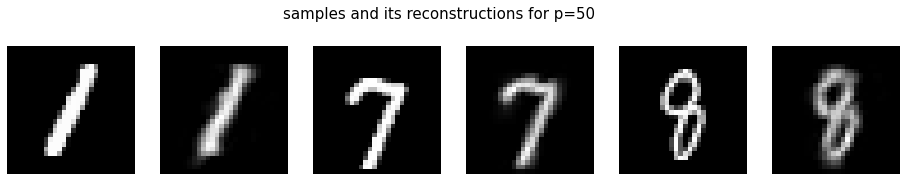

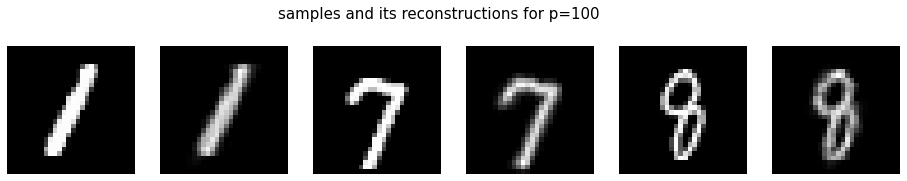

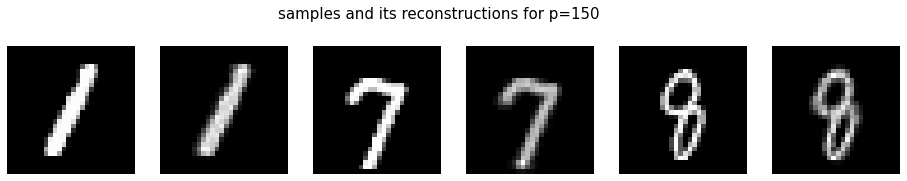

In [76]:
samples_indices = [100,1500,2500] # choosing indices such that we get a sample from each class
list_components = [2,30,50,100,150]
for p in list_components:
  nmf_digits_p = NMF(n_components=p, init='random',random_state=1,max_iter=2000)
  xp_digits = nmf_digits_p.fit_transform(x2)
  # Reconstructing the data from the projected samples
  x_reconstructed_digits = nmf_digits_p.inverse_transform(xp_digits)
  # Visualizing few samples and its reconstruction
  fig, axs = pl.subplots(1, 2*len(samples_indices), figsize=(16,3))
  pl.suptitle(f'samples and its reconstructions for p={p}',fontsize=15)
  for i in range(0,2*len(samples_indices),2):
    axs[i].imshow(x2[samples_indices[i//2]].reshape(28,28), cmap='gray')
    axs[i+1].imshow(x_reconstructed_digits[samples_indices[i//2]].reshape(28,28), cmap='gray')
    axs[i].axis('off')
    axs[i+1].axis('off')

> **Comments:**<br>
As for the PCA, the quality improves with the increase of p. However, we reach a better quality with NMF since comparing to the PCA we have reconstructed images that are clearer and closer to the original ones for high values of p.

## 4.2 Manifold Learning : TSNE

**Temperature dataset** 

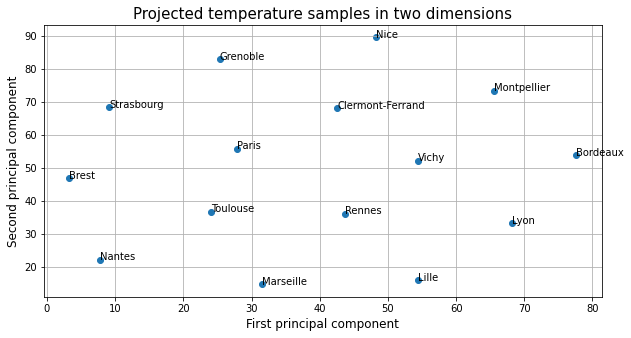

In [77]:
tsne_temper = TSNE(n_components=2,init='random',learning_rate='auto')
x1_tsne = tsne_temper.fit_transform(x1)
# Plotting the projected data
pl.figure(figsize=(10,5)) 
pl.scatter(x1_tsne[:,0],x1_tsne[:,1])
for i in range(len(villes)):
  pl.text(x1_tsne[i,0],x1_tsne[i,1],villes[i])
pl.title('Projected temperature samples in two dimensions',fontsize=15)
pl.xlabel('First principal component',fontsize=12)
pl.ylabel('Second principal component',fontsize=12)
pl.grid()

> **Comments:**<br>
The projection using TSNE doesn't preserve the geographical information. In fact, cities that are far geographically are represented in the projection by samples that are close.Besides, we cannot observe any cluster because there is approxiamely the same distance between adjacent data points.


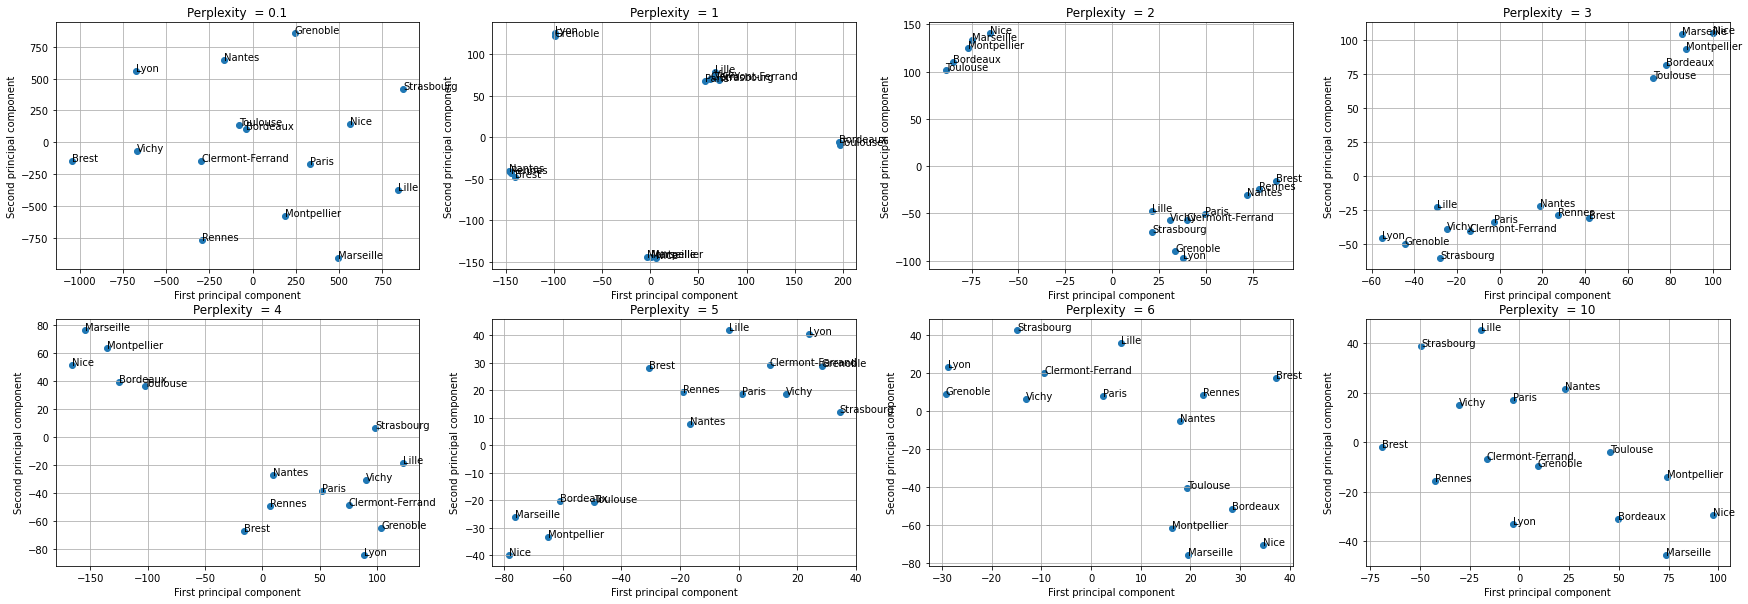

In [ ]:
# Influence of perplexity
list_perplexity=[0.1,1,2,3,4,5,6,10]
fig,ax=pl.subplots(2,4,figsize=(30,10))
for i,axs in enumerate(ax.flat):
    x1_tsne=TSNE(n_components=2, init='random',learning_rate='auto',perplexity=list_perplexity[i]).fit_transform(x1)
    axs.scatter(x1_tsne[:,0],x1_tsne[:,1])
    for k in range(len(villes)):
      axs.text(x1_tsne[k,0],x1_tsne[k,1],villes[k])
    axs.set_title(f'Perplexity  = {list_perplexity[i]}')
    axs.set_xlabel('First principal component',fontsize=10)
    axs.set_ylabel('Second principal component',fontsize=10)
    axs.grid()


> **Comments:**<br>
- For small perplexity (perplexity=0.1), TSNE show non existing clusters.
- For perplexity equal to 1 we obtain five clusters such that the data points in each clusters are very close so that each cluster is seen as a single point.mooving from  perplexity =1 to perplexity=2, we obtain tclusters which are the same as those obtained by k-means but more separated and thus more distinguishable. when the complexity increase to 3,4 and to 5  we obtain two well separated clusters that become less separated when perplexity is equal to 6. Thse two clusters are also the same as the ones obtained by k-means.
-For very high perplexity (perplexity=10), we don't obtain any clusters since the geographic information is not preserved anymore.



- **Digits dataset**

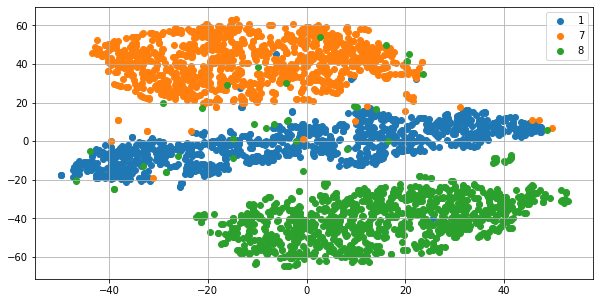

In [78]:
tsne_digits = TSNE(n_components=2,init='random',learning_rate='auto')
x2_tsne = tsne_digits.fit_transform(x2)
# Plotting the projected data
pl.figure(figsize=(10,5))
dictionary = {'1':(0,1000),'7':(1000,2000),'8':(2000,3000)}
for key, value in dictionary.items():
  pl.scatter(x2_tsne[value[0]:value[1],0],x2_tsne[value[0]:value[1],1], label=key)
pl.legend()
pl.grid()

> **Comments:**<br>
TSNE gives very good results in case of digits dataset comparing to PCA and NMF since the clusers doesn't present no overlap so that we can clearly distinguish the samples from different classes. 

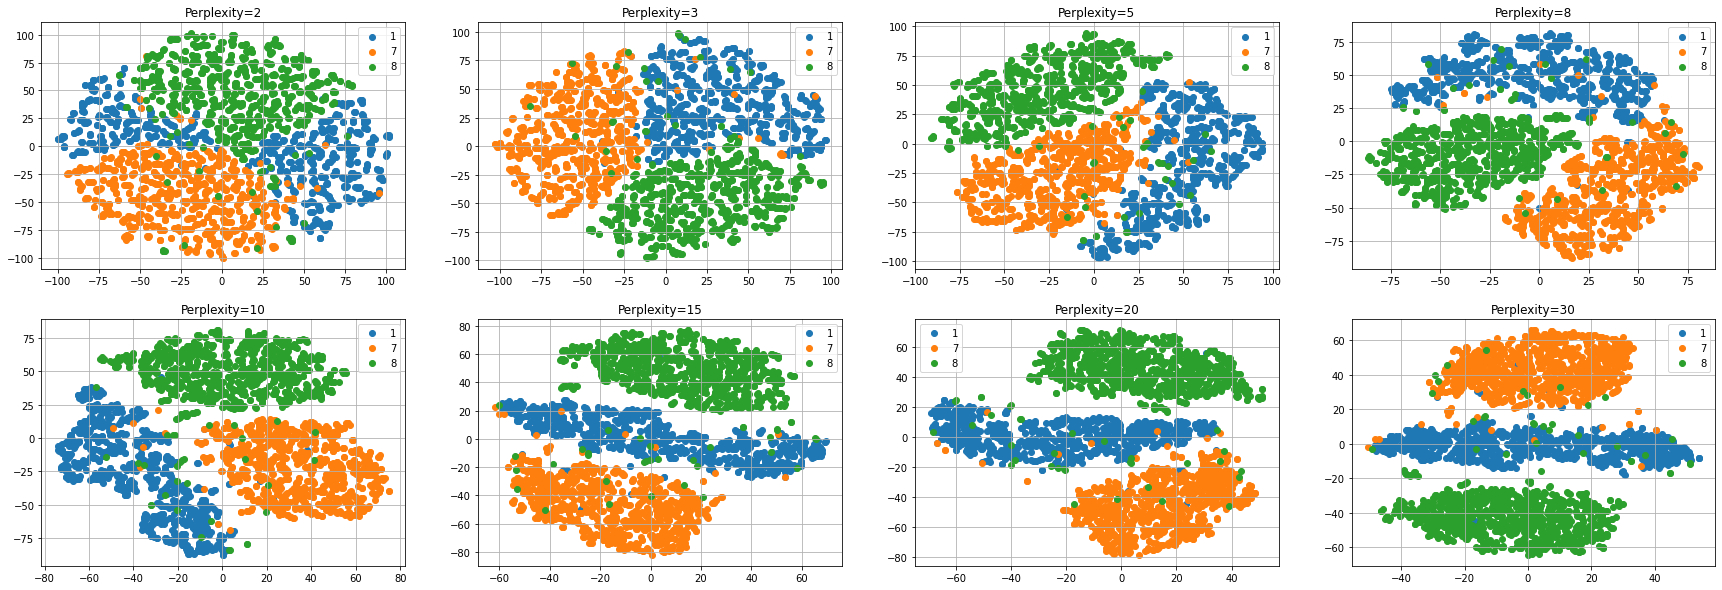

In [79]:
# Influence of perplexity
list_perplexity=[2,3,5,8,10,15,20,30]
fig,ax=pl.subplots(2,4,figsize=(30,10))
for i,axs in enumerate(ax.flat):
    x2_tsne=TSNE(n_components=2, init='random',learning_rate='auto',perplexity=list_perplexity[i]).fit_transform(x2)
    
    dictionary = {'1':(0,1000),'7':(1000,2000),'8':(2000,3000)}
    for key, value in dictionary.items():
      axs.scatter(x2_tsne[value[0]:value[1],0],x2_tsne[value[0]:value[1],1], label=key)
    axs.set_title(f'Perplexity={list_perplexity[i]}')
    axs.legend()
    axs.grid()

> **Comments:**<br>
W notice that the more the perplexity increases the more the clusters become compact and thus more separated. In fact, when the perplexity is equal to 2, 4 and 5, the projected samples from different classes are overlapping and for each class the samples doesn't form a compact structure.
Starting from perplexity=10 the margins betweeen samples of different classes appears and thus it becomes easier to distinguish samples of different classes.


## **Personal discussion:**<br>
-  The two new algorithms for me are GMM and TSNE :The GMM method is so interesting since it can be used on any data where the number of samples is considerably high (so that the assumption of gaussian data is satisfied) and we can visualize the variance around the mean so it gives us a better visualization and also it allows to detect the outliers. For the TSNE I was very surprised by the results in the case of the digits datasets it gave almost a perfect result where the clusters are very well seperated with margins.
I found it also important to visualize some reconstructed samples and test the influence of the number of component on the reconstruction quality.